In [1]:
%matplotlib inline
#from typing import Dict, Tuple, List, Union, Iterable

import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
#from matplotlib.ticker import AutoMinorLocator
plt.style.use("lm")
import numpy as np
#import scipy.linalg as sl #expm
#import os
#import time
#import random
#import string
#import copy
#from tabulate import tabulate
import samplebase as sb

import path_utils as putils

In [2]:
from decimal import Decimal

def fexp(number):
    (sign, digits, exponent) = Decimal(number).as_tuple()
    return len(digits) + exponent - 1

def fman(number):
    return Decimal(number).scaleb(-fexp(number)).normalize()

def to_latex_value_with_err(value, err, n_round=1, include_math_env=False):
    assert abs(value) > abs(err)
    val_exp = fexp(value)
    err_2 = err / (10**val_exp)
    n_round = max(-1*fexp(err_2),n_round)
    err_man = round(err_2, n_round)
    val_man = round(fman(value), n_round)
    val_str = ("{:0." + str(n_round) + "f}").format(val_man)
    err_str = ("{:0." + str(n_round) + "f}").format(err_man)
    if val_exp==0:
        result = val_str + " \pm " + err_str
    else:
        result = r"( " + val_str + " \pm " + err_str + r")\times 10^" + "{" + str(val_exp) +"}"
    if include_math_env:
        result = r"$ " + result + r" $"
    return result

def to_latex_value(value, n_round=1, include_math_env=False):
    val_exp = fexp(value)
    val_man = round(fman(value), n_round)
    val_str = ("{:0." + str(n_round) + "f}").format(val_man)
    if val_exp==0:
        result = val_str
    else:
        result = val_str + r"\times 10^" + "{" + str(val_exp) +"} "
    
    if include_math_env:
        result = r"$ " + result + r" $"
    return result

print(to_latex_value_with_err(1e-3, 0.5e-6))
print(to_latex_value(4e-3))
print(to_latex_value_with_err(1e-3, 0.5e-6, include_math_env=True))
print(to_latex_value(4e-3, include_math_env=True))
print(to_latex_value(1.3))
print(to_latex_value_with_err(1.2, 1.1))

( 1.0000 \pm 0.0005)\times 10^{-3}
4.0\times 10^{-3} 
$ ( 1.0000 \pm 0.0005)\times 10^{-3} $
$ 4.0\times 10^{-3}  $
1.3
1.2 \pm 1.1


In [3]:
def cluster_along_arg(samples, arg_key, arg_values):
    """
    Transform list of samples into a dictionary that maps 
    from arg_value (described by arg_key) to the clustered 
    samples list.
    """
    clustered_samples = dict()
    for arg_value in arg_values:
        clustered_samples[arg_value] = []
    
    for sample in samples:
        for arg_value in arg_values:
            if sample.args[arg_key] == arg_value:
                clustered_samples[arg_value].append(sample)
    
    return clustered_samples

In [4]:
def plot_overview(plot_functions, n_rows=1, n_cols=3, size_factor=1.):
    plt.figure(1, figsize=(5*n_cols*size_factor,3.6*n_rows*size_factor))
    n_plots = n_rows * n_cols
    idx = 1
    for pf in plot_functions:
        if idx > n_plots:
            break
        plt.subplot(n_rows, n_cols, idx)
        #plt.xscale("log")
        #secondrow = (idx in [7,8,9,10,11,12]) or (idx in [19,20,21,22,23,24]) or (idx in [31,32,33,34,35,36])
        #if secondrow:
        #    plt.gca().set_axis_bgcolor('#ededed')
        pf()
        idx += 1

    plt.subplots_adjust(top=0.96, bottom=0.04, left=0.07, right=0.97, hspace=0.4, wspace=0.35)
    #plt.tight_layout(pad=0.6, w_pad=2.0, h_pad=2.0)

In [5]:
data_dir = putils.data_dir(25)
data_dir

'/srv/public/chrisfr/workspace/data/rlearn-25'

In [6]:
all_samples = sb.list_of_samples(data_dir)
n_done = sum([1 for s in all_samples if s.done])
n_total = len(all_samples)
print(n_done, "/", n_total)

700 / 700


In [7]:
done_samples = [s for s in all_samples if s.done]

In [8]:
done_samples[0].args

{'alpha': array([0.07906043, 0.10481131, 0.13894955, 0.184207  , 0.24420531,
        0.32374575, 0.42919343, 0.5689866 , 0.75431201, 1.        ]),
 'n_splits': 20,
 'gillespie_realisations': 10000,
 'iid_id': 7,
 'traj_file_path': './gillespie_trajs_conced_1_3_zipped_shuffled.h5'}

In [9]:
done_samples[0].result["cv_result"]

[{'alpha': 0.07906043210907701,
  'cutoff': 0.0,
  'l1_ratio': 1.0,
  'score': [-0.7105713305672706,
   -0.5873107981883334,
   -0.722619980036521,
   -0.6408619187680805,
   -0.6836023824037339,
   -0.9972115319622817,
   -0.6015859812672378,
   -0.3382551630845356,
   -0.8812406944735496,
   -0.8907017988686753,
   -0.9944124112690925,
   -0.49139709536390086,
   -0.8705743056647868,
   -0.3786367456567994,
   -0.682690353195244,
   -0.41884721725306534,
   -0.6992617674567947,
   -0.8408868773579857,
   -0.3051555293232806,
   -0.6326045219951831]},
 {'alpha': 0.10481131341546852,
  'cutoff': 0.0,
  'l1_ratio': 1.0,
  'score': [-0.7405209700508166,
   -0.6118365811886187,
   -0.753989792551356,
   -0.665705451660083,
   -0.7141840534880606,
   -1.0694453427084838,
   -0.6263173362039737,
   -0.35018893171762916,
   -0.9281668107440582,
   -0.9235917667579153,
   -1.0787270049463857,
   -0.5087105332844414,
   -0.9137986540205885,
   -0.3924718808930594,
   -0.7105202379220847,
   -0

In [10]:
# get cv_result for every alpha, gill_real, iid
cv_results = []
for ds in done_samples:
    for alpha_idx, current_alpha in enumerate(ds.args["alpha"]):
        element = {
            "alpha": current_alpha, 
            "gillespie_realisations": ds.args["gillespie_realisations"], 
            "iid": ds.args["iid_id"], 
            "scores": np.array(ds.result["cv_result"][alpha_idx]["score"])}
        cv_results.append(element)

In [11]:
import pandas as pd

In [12]:
cv_results = pd.DataFrame(cv_results)

In [13]:
cv_results.head()

,alpha,gillespie_realisations,iid,scores
0,0.079060,10000,7,"[-0.7105713305672706, -0.5873107981883334, -0...."
1,0.104811,10000,7,"[-0.7405209700508166, -0.6118365811886187, -0...."
2,0.138950,10000,7,"[-0.7753285522684094, -0.6403480085732624, -0...."
3,0.184207,10000,7,"[-0.8358847966110917, -0.6912499559193945, -0...."
4,0.244205,10000,7,"[-0.936681699752783, -0.7751905338322211, -0.9..."


In [14]:
alphas = set()
timesteps = set()
noises = set()
folds = set()
iids = set()
gillespie_realisations = set()
for s in all_samples:
    if s.done:
        #alphas.add(s.args["alpha"])
        #timesteps.add(s.args["dt"])
        #noises.add(s.args["noise"])
        folds.add(s.args["n_splits"])
        gillespie_realisations.add(s.args["gillespie_realisations"])
        iids.add(s.args["iid_id"])
#alphas = np.fromiter(alphas, dtype=float)
#alphas.sort()
alphas = np.logspace(-6, 0, num=50)
timesteps = np.fromiter(timesteps, dtype=float)
timesteps.sort()
noises = np.fromiter(noises, dtype=float)
noises.sort()
folds = np.fromiter(folds, dtype=int)
folds.sort()
gillespie_realisations = np.fromiter(gillespie_realisations, dtype=int)
gillespie_realisations.sort()
iids = np.fromiter(iids, dtype=int)
iids.sort()
print(alphas)
print(timesteps)
print(noises)
print(folds)
print(gillespie_realisations)
print(iids)

[1.00000000e-06 1.32571137e-06 1.75751062e-06 2.32995181e-06
 3.08884360e-06 4.09491506e-06 5.42867544e-06 7.19685673e-06
 9.54095476e-06 1.26485522e-05 1.67683294e-05 2.22299648e-05
 2.94705170e-05 3.90693994e-05 5.17947468e-05 6.86648845e-05
 9.10298178e-05 1.20679264e-04 1.59985872e-04 2.12095089e-04
 2.81176870e-04 3.72759372e-04 4.94171336e-04 6.55128557e-04
 8.68511374e-04 1.15139540e-03 1.52641797e-03 2.02358965e-03
 2.68269580e-03 3.55648031e-03 4.71486636e-03 6.25055193e-03
 8.28642773e-03 1.09854114e-02 1.45634848e-02 1.93069773e-02
 2.55954792e-02 3.39322177e-02 4.49843267e-02 5.96362332e-02
 7.90604321e-02 1.04811313e-01 1.38949549e-01 1.84206997e-01
 2.44205309e-01 3.23745754e-01 4.29193426e-01 5.68986603e-01
 7.54312006e-01 1.00000000e+00]
[]
[]
[20]
[    1     2     5    10    20    50   100   200   500  1000  2000  5000
 10000 20000]
[0 1 2 3 4 5 6 7 8 9]


In [15]:
if False:
    samples = cluster_along_arg(done_samples, "gillespie_realisations", gillespie_realisations)
    for g in gillespie_realisations:
        samples[g] = cluster_along_arg(samples[g], "n_splits", folds)

In [16]:
def plot_validation(sample_list, mean=True, exclude_first_fold=True):
    #sorted_samples = sorted(sample_list, key=lambda x: x.args["alpha"])
    alpha_lower = 1e-9
    alpha_upper = 1e-2
    #sorted_samples = [s for s in sorted_samples if alpha_lower < s.args["alpha"] < alpha_upper ]
    #scores = np.array([ np.array(s.result["cv_result"][0]["score"]) for s in sorted_samples])
    #print(scores)
    alphas = []
    scores = []
    for s in sample_list:
        for result in s.result["cv_result"]:
            alphas.append(result["alpha"])
            scores.append(result["score"])
    alphas = np.array(alphas)
    scores = np.array(scores)
    n_samples = len(scores[0])
    #scores = np.mean(scores, axis=1)
    min_indices = np.argmin(-scores)
    #alphas = np.array([ s.args["alpha"] for s in sorted_samples])
    if mean:
        if exclude_first_fold:
            exclude_first = scores[:, 1:]
            mean_scores = np.mean(exclude_first, axis=1)
            err_scores = np.std(exclude_first, axis=1) / np.sqrt(n_samples-1 if n_samples>2 else 1)
        else:
            mean_scores = np.mean(scores, axis=1)
            err_scores = np.std(scores, axis=1) / np.sqrt(n_samples if n_samples>2 else 1)
        plt.errorbar(alphas, - mean_scores, yerr=err_scores, fmt=".")
        print("best mean score for alpha={}".format(alphas[np.argmin(-mean_scores)]))
    else:
        start_at = 1 if exclude_first_fold else 0
        for i in range(start_at, n_folds):
            #if i < 7:
            plt.plot(alphas, - scores[:,i], ".", label=str(i))
    plt.legend()
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(r"$\alpha$")
    plt.ylabel("score")
    
def plot_trajs(sample_list, mean=True):
    sorted_samples = sorted(sample_list, key=lambda x: x.args["alpha"])
    traj_counts = [ s.result["counts"] for s in sorted_samples ]
    for counts in traj_counts[1:2]:
        plt.plot(counts, alpha=1.0)

In [17]:
n_folds=5
hyperparam_for_realisation = dict()

def plot_validation_pd(cv_results_for_g : pd.DataFrame, exclude_first_fold=False, mean=False, n_real=0):
    scores_for_alpha = []
    errs_for_alpha = []
    for a in alphas:
        slice_alpha = cv_results_for_g[cv_results_for_g.alpha == a]
        all_scores = np.array([x for x in slice_alpha.scores.values])
        #print(all_scores)
        if exclude_first_fold:
            scores = all_scores[:,:]
        else:
            scores = all_scores
        
        if mean:
            # average over folds and iids
            n = scores.size
            mean_score = np.mean(scores)
            err_score = np.std(scores) / np.sqrt(n)
        else:
            # only average over iids
            n = scores.shape[0]
            mean_score = np.mean(scores, axis=0)
            err_score = np.std(scores, axis=0) / np.sqrt(n)
        
        scores_for_alpha.append(mean_score)
        errs_for_alpha.append(err_score)
    
    scores_for_alpha = np.array([x for x in scores_for_alpha])
    errs_for_alpha = np.array([x for x in errs_for_alpha])
    print(errs_for_alpha.shape)
    #if mean:
    min_indices = np.argmin(-scores_for_alpha, axis=0)
    #else:
    #    min_indices = 
    min_alpha = alphas[min_indices]
    print("n_real", n_real, "min_alpha", min_alpha)
    if mean:
        plt.errorbar(alphas, -scores_for_alpha, yerr=errs_for_alpha)
    else:
        for i in range(n_folds - 1 if exclude_first_fold else n_folds):
            plt.errorbar(alphas, -scores_for_alpha[:, i], yerr=errs_for_alpha[:,i],
                         label="fold "+str(i + 1 if exclude_first_fold else i))
    plt.legend()
    plt.title(r"$n_\mathrm{real}=" + str(n_real) + r"$, $\alpha_\mathrm{min}=$" + str(min_alpha if mean else ""))
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel(r"$\alpha$")
    plt.ylabel("score")
    
    if mean:
        hyperparam_for_realisation[n_real] = min_alpha

In [18]:
pfs = []
for g in gillespie_realisations:
    cv_results_g = cv_results[cv_results.gillespie_realisations == g]
    #plot_validation_pd(cv_results_g, exclude_first_score=True, mean=True)
    pfs.append(lambda df=cv_results_g, _g=g: plot_validation_pd(df, mean=True, exclude_first_fold=False, n_real=_g))

[samplebase] [2018-09-24 10:55:36] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-09-24 10:55:36] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-09-24 10:55:37] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-09-24 10:55:37] [WARNING] No handles with labels found to put in legend.


(50,)
n_real 1 min_alpha 0.0003727593720314938
(50,)
n_real 2 min_alpha 0.00012067926406393288
(50,)
n_real 5 min_alpha 9.102981779915228e-05
(50,)
n_real 10 min_alpha 1.67683293681101e-05


[samplebase] [2018-09-24 10:55:37] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-09-24 10:55:37] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-09-24 10:55:37] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-09-24 10:55:37] [WARNING] No handles with labels found to put in legend.


(50,)
n_real 20 min_alpha 6.866488450042999e-05
(50,)
n_real 50 min_alpha 2.94705170255181e-05
(50,)
n_real 100 min_alpha 7.196856730011514e-06
(50,)
n_real 200 min_alpha 1.67683293681101e-05


[samplebase] [2018-09-24 10:55:37] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-09-24 10:55:37] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-09-24 10:55:37] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-09-24 10:55:37] [WARNING] No handles with labels found to put in legend.


(50,)
n_real 500 min_alpha 9.540954763499944e-06
(50,)
n_real 1000 min_alpha 5.428675439323859e-06
(50,)
n_real 2000 min_alpha 7.196856730011514e-06
(50,)
n_real 5000 min_alpha 5.428675439323859e-06


[samplebase] [2018-09-24 10:55:37] [WARNING] No handles with labels found to put in legend.
[samplebase] [2018-09-24 10:55:37] [WARNING] No handles with labels found to put in legend.


(50,)
n_real 10000 min_alpha 3.0888435964774785e-06
(50,)
n_real 20000 min_alpha 1.757510624854793e-06


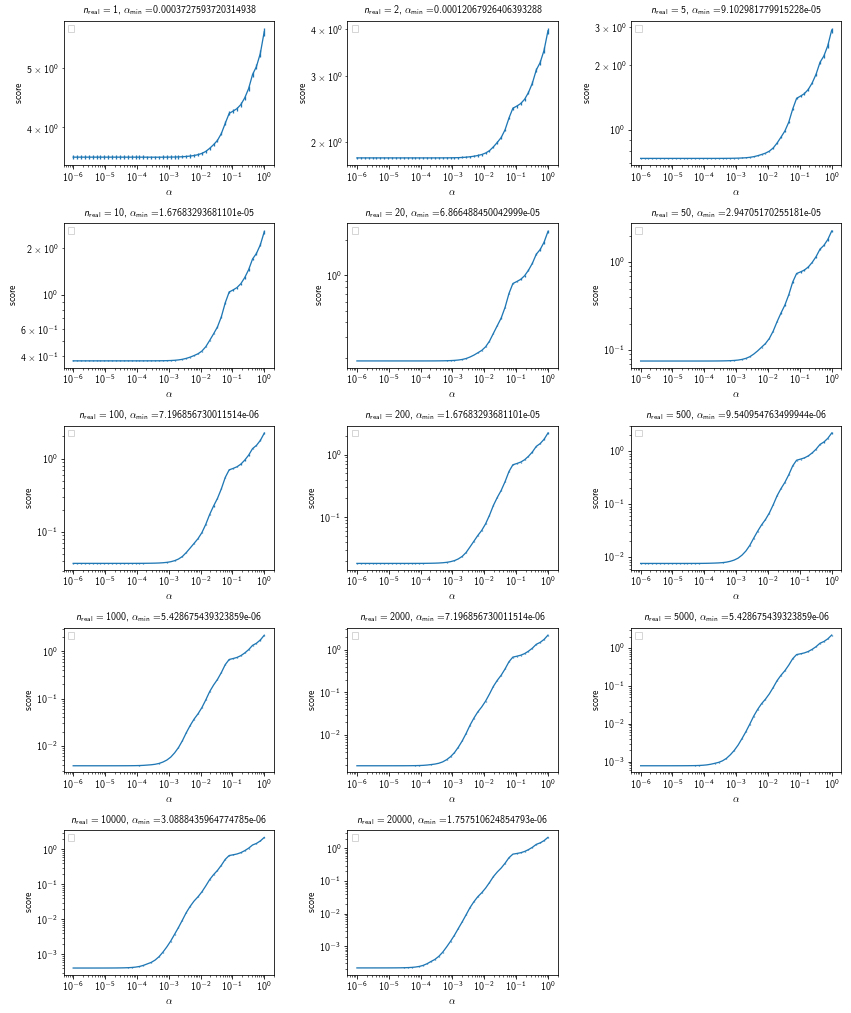

In [19]:
plot_overview(pfs, n_rows=5, n_cols=3, size_factor=0.8)
#plt.savefig("cv_gill_kfold_scale500_singlefolds_all_folds.pdf", bbox_inches="tight", transparent=True)

Text(0,0.5,'hyperparameter found by kfold')

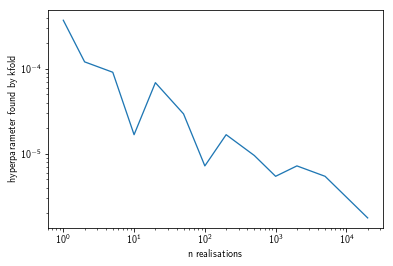

In [20]:
plt.plot([x for x in hyperparam_for_realisation.keys()], [x for x in hyperparam_for_realisation.values()])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("n realisations")
plt.ylabel("hyperparameter found by kfold")

In [21]:
if False:
    import pickle
    with open("hyperparam.pickle", "wb") as f:
        pickle.dump(hyperparam_for_realisation, f)

In [22]:
if False:
    import pickle
    with open("hyperparam.pickle", "rb") as f:
        hyperparam_for_realisation = pickle.load(f)

## l1 vs n_real
For each $n_\mathrm{real}$ and $iid$ solve the system and compare the according estimated rates with the desired rates.

In [23]:
import run_cv as rs

In [24]:
dt = 3e-3
target_time = 2.

In [25]:
# get desired rates
regulation_network, analysis = rs.get_regulation_network(dt, 0.0, target_time, gillespie_realisations=None, scale=1.)
desired_rates = regulation_network.desired_rates

obtaining regulation network with dt = 0.003
generating data by integrating the law of mass action with additive lma_noise 0.0
0.003
0.003


In [26]:
import time

(g,i)=(1,0) ...
find hyperparameter
current_scores [3.5395093  3.53950698 3.53950389 3.53949982 3.53949439 3.53948722
 3.53947774 3.53946491 3.53944799 3.53942541 3.53939511 3.53935502
 3.53930546 3.53923998 3.53915507 3.53904468 3.53890746 3.53873645
 3.53853888 3.53838781 3.53830354 3.53835074 3.53866349 3.53912148
 3.53983323 3.54085822 3.54204107 3.54369204 3.54699281 3.55362647
 3.55946138 3.56796638 3.58058823 3.59753669 3.62663228 3.67620807
 3.75343379 3.81372389 3.91036367 4.06351385 4.20776067 4.24124004
 4.27936919 4.34637048 4.45847148 4.61616338 4.87068223 5.02120989
 5.28456837 5.74646783]


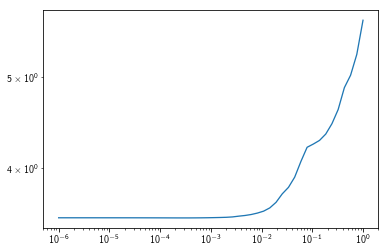

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
260 / 30000 iterations
applying cutoff
... took 62.427252748049796 seconds
(g,i)=(1,1) ...
find hyperparameter
current_scores [3.3746582  3.37465891 3.37465986 3.3746611  3.3746626  3.37466448
 3.374667   3.37467032 3.37467478 3.3746808  3.37468859 3.37469936
 3.37471403 3.37472566 3.37473751 3.37474091 3.37477129 3.37477109
 3.37469059 3.37454198 3.37439268 3.3744006  3.37439577 3.37442887
 3.3749813  3.37565693 3.37597867 3.37677643 3.37884579 3.38249193
 3.3858227  3.3912335  3.40263056 3.41986074 3.44360488 3.47153381
 3.50515188 3.56181704 3.65964285 3.79904439 3.95461567 3.9855
 4.022892   4.08792502 4.20080509 4.35

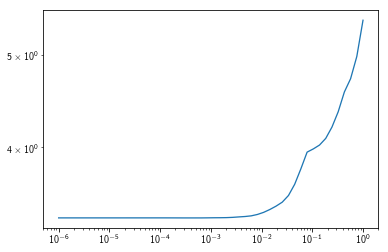

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
224 / 30000 iterations
applying cutoff
... took 49.258017516927794 seconds
(g,i)=(1,2) ...
find hyperparameter
current_scores [3.60563907 3.60563721 3.60563476 3.60563152 3.60562727 3.60562166
 3.60561423 3.60560398 3.60559029 3.60557199 3.60554738 3.60551532
 3.6054741  3.60542009 3.60534934 3.60524794 3.60511782 3.60494893
 3.60475615 3.60462774 3.60472228 3.60504625 3.60527185 3.60504463
 3.60524469 3.60521424 3.6047388  3.60606927 3.61015917 3.61593258
 3.6256118  3.63735062 3.64950781 3.66963211 3.69850964 3.73866844
 3.7857166  3.84336622 3.92952124 4.07707848 4.20765832 4.2427587
 4.2829014  4.35099074 4.46758082 4

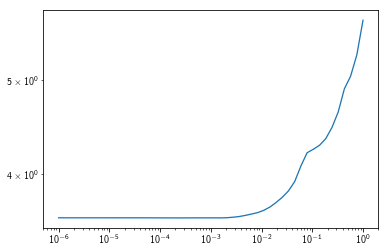

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00021209508879201905, lambda=1.0)!
status 0: Optimization terminated successfully.
250 / 30000 iterations
applying cutoff
... took 56.647578480886295 seconds
(g,i)=(1,3) ...
find hyperparameter
current_scores [3.57172193 3.57172217 3.57172246 3.57172287 3.57172341 3.57172413
 3.57172506 3.57172606 3.57172743 3.57172908 3.57172994 3.57173117
 3.57173212 3.57173049 3.57173208 3.57174287 3.57176214 3.57179094
 3.57180384 3.57179332 3.57161497 3.57122021 3.57066269 3.57022663
 3.57006057 3.57016003 3.57076544 3.57226982 3.57446835 3.57828829
 3.58388043 3.59050169 3.60114774 3.61672584 3.64159356 3.68067482
 3.73122594 3.79178704 3.89730233 4.08332443 4.25846067 4.29872406
 4.34773917 4.41483374 4.52550104

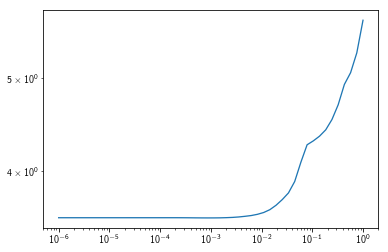

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.000868511373751352, lambda=1.0)!
status 0: Optimization terminated successfully.
216 / 30000 iterations
applying cutoff
... took 47.676806933945045 seconds
(g,i)=(1,4) ...
find hyperparameter
current_scores [3.65301863 3.65301781 3.65301672 3.65301528 3.65301338 3.65301086
 3.65300755 3.65300319 3.65299745 3.65298994 3.65297938 3.65296541
 3.65294738 3.65292542 3.65290397 3.65287653 3.65284453 3.65281328
 3.65277817 3.65274818 3.65270624 3.65265781 3.65285765 3.6535048
 3.65455423 3.65610263 3.65672848 3.65707297 3.6583906  3.66031531
 3.66325947 3.66831582 3.67699531 3.69276583 3.7188024  3.76314369
 3.80998645 3.86479906 3.96106451 4.10926928 4.27025001 4.30730918
 4.34966615 4.41569861 4.5297822  4.

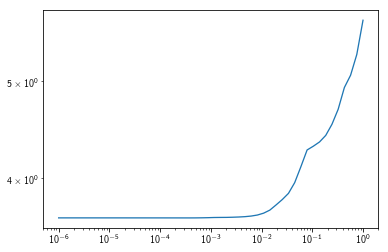

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0003727593720314938, lambda=1.0)!
status 0: Optimization terminated successfully.
222 / 30000 iterations
applying cutoff
... took 49.0294808880426 seconds
(g,i)=(1,5) ...
find hyperparameter
current_scores [3.47436613 3.47436538 3.47436437 3.47436304 3.47436128 3.47435895
 3.47435586 3.47435177 3.47434637 3.47433923 3.4743298  3.47431789
 3.47430251 3.47428341 3.47425801 3.47422079 3.47416901 3.47410169
 3.47402166 3.47392326 3.47388418 3.47394677 3.47433685 3.4750561
 3.47610975 3.47726602 3.4779235  3.48016436 3.48352968 3.48543687
 3.48976998 3.49764874 3.50819332 3.52543164 3.55486139 3.59683
 3.63489271 3.68824562 3.78203895 3.91692914 4.07001946 4.13584197
 4.17428428 4.24175495 4.35160514 4.5116

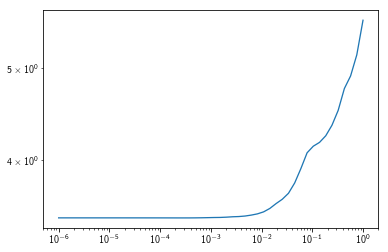

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
198 / 30000 iterations
applying cutoff
... took 43.765962128993124 seconds
(g,i)=(1,6) ...
find hyperparameter
current_scores [3.57596357 3.57596292 3.57596205 3.57596091 3.57595941 3.57595742
 3.57595479 3.57595088 3.57594494 3.57593727 3.57592731 3.57591432
 3.57589743 3.57587566 3.57584598 3.5758038  3.57575514 3.57568139
 3.57554152 3.57545276 3.57528412 3.57505488 3.57504797 3.57557869
 3.57675196 3.57808793 3.57962333 3.58136078 3.58444106 3.58630479
 3.58870908 3.59491575 3.60406568 3.62068949 3.64977703 3.69937085
 3.74444267 3.80696519 3.92751686 4.088296   4.23524079 4.26431978
 4.30204143 4.36869627 4.4798072  

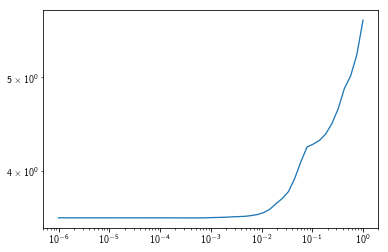

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0004941713361323833, lambda=1.0)!
status 0: Optimization terminated successfully.
227 / 30000 iterations
applying cutoff
... took 49.914166030008346 seconds
(g,i)=(1,7) ...
find hyperparameter
current_scores [3.72200762 3.72200706 3.72200632 3.72200535 3.72200405 3.72200233
 3.72200006 3.72199706 3.72199312 3.72198799 3.72198125 3.72197242
 3.72196081 3.72194278 3.7219237  3.72190342 3.72187537 3.72184138
 3.72177467 3.72168629 3.72157341 3.7214171  3.72126423 3.72119891
 3.72133753 3.72168264 3.72253266 3.72396327 3.72661375 3.73091319
 3.7375492  3.74784611 3.76199791 3.78112508 3.81037148 3.8580819
 3.89889307 3.95825432 4.06057464 4.21732601 4.40543811 4.44141055
 4.47956384 4.54564293 4.65212716 4

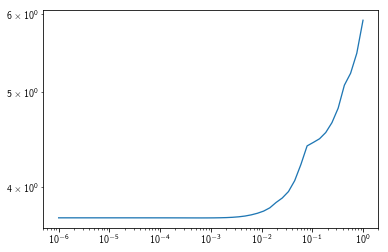

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0006551285568595509, lambda=1.0)!
status 0: Optimization terminated successfully.
178 / 30000 iterations
applying cutoff
... took 42.70186327106785 seconds
(g,i)=(1,8) ...
find hyperparameter
current_scores [3.49436456 3.49436317 3.49436133 3.49435889 3.49435566 3.49435138
 3.49434572 3.49433824 3.49432979 3.49431868 3.49430401 3.49428448
 3.49425875 3.49422502 3.49418071 3.49412137 3.49405332 3.493953
 3.49380334 3.49357806 3.49327289 3.49302545 3.49286239 3.49289544
 3.49296904 3.49302903 3.49323385 3.49415354 3.49614083 3.49952704
 3.5050765  3.51421069 3.52957646 3.54937604 3.57473027 3.61747174
 3.67963591 3.74193826 3.84024973 3.98756023 4.11940357 4.14827498
 4.18601019 4.25377884 4.36498549 4.5

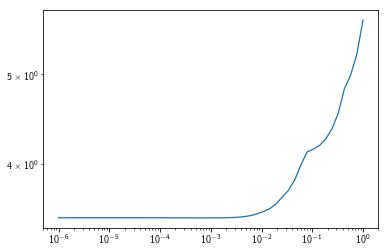

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0004941713361323833, lambda=1.0)!
status 0: Optimization terminated successfully.
214 / 30000 iterations
applying cutoff
... took 48.74869759194553 seconds
(g,i)=(1,9) ...
find hyperparameter
current_scores [3.75538335 3.75538254 3.75538147 3.75538004 3.75537816 3.75537566
 3.75537236 3.75536799 3.75536221 3.75535458 3.7553445  3.75533123
 3.75531379 3.75529075 3.75525962 3.75521913 3.75516782 3.7551031
 3.75503495 3.75496604 3.75492548 3.75491048 3.75499695 3.75531356
 3.75617585 3.75727449 3.75858253 3.76075521 3.7637999  3.76772441
 3.77219056 3.77779483 3.78691353 3.80188414 3.82860301 3.87534756
 3.94969456 4.03111128 4.137273   4.29903354 4.4507899  4.48105983
 4.52022869 4.58907464 4.69554272 4.

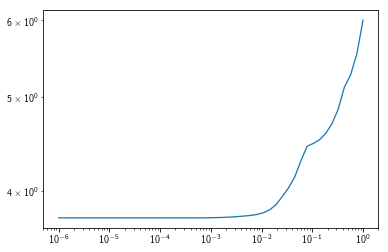

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0003727593720314938, lambda=1.0)!
status 0: Optimization terminated successfully.
216 / 30000 iterations
applying cutoff
... took 47.79266005696263 seconds
(g,i)=(2,0) ...
find hyperparameter
current_scores [1.88695288 1.88695267 1.88695239 1.88695202 1.88695153 1.8869511
 1.88695077 1.88695034 1.8869498  1.88694913 1.88694833 1.88694998
 1.88695188 1.88695769 1.88699246 1.88704898 1.88712428 1.88725328
 1.8874217  1.88760232 1.88777742 1.88788736 1.88829374 1.88889765
 1.88929526 1.89032854 1.89137787 1.89269539 1.89488018 1.89882962
 1.9037886  1.91070474 1.92283254 1.94197714 1.96810664 2.01450675
 2.07766842 2.13724117 2.23858796 2.40203438 2.55699747 2.58832893
 2.6263873  2.69331562 2.8079009  2.

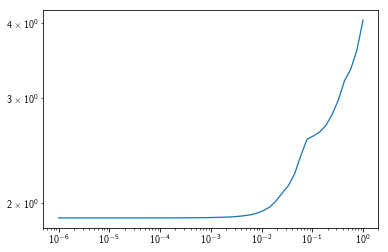

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.67683293681101e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
255 / 30000 iterations
applying cutoff
... took 57.46749810106121 seconds
(g,i)=(2,1) ...
find hyperparameter
current_scores [1.78495335 1.78495277 1.784952   1.78495099 1.78494964 1.78494798
 1.78494578 1.78494289 1.78493913 1.78493433 1.78492831 1.78492021
 1.78490922 1.78489296 1.78487587 1.78486122 1.78483613 1.78480291
 1.78478415 1.78485646 1.78499693 1.78542032 1.78554727 1.78582403
 1.78633338 1.78687291 1.78788401 1.78933299 1.79148079 1.79498802
 1.79947283 1.80499695 1.81364881 1.82839062 1.85391164 1.89796871
 1.95460262 2.01532786 2.11748679 2.28492976 2.44509802 2.47805725
 2.5159206  2.58242038 2.69029807 2.

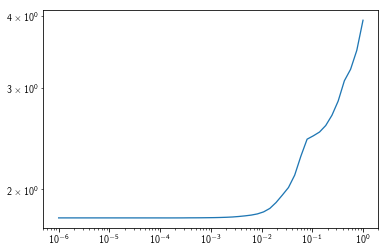

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
257 / 30000 iterations
applying cutoff
... took 56.47655978798866 seconds
(g,i)=(2,2) ...
find hyperparameter
current_scores [1.78882193 1.7888214  1.78882074 1.78881986 1.78881869 1.78881726
 1.78881545 1.78881295 1.78881005 1.7888063  1.78880141 1.78879504
 1.78878709 1.78877717 1.78876435 1.78875074 1.78874115 1.78873881
 1.78873384 1.78873463 1.78875738 1.78882784 1.7889888  1.78943395
 1.79033171 1.79146571 1.79287183 1.79510068 1.7989671  1.80457642
 1.80954017 1.81844369 1.83188699 1.84968134 1.87720989 1.92233617
 1.98433324 2.04512745 2.14308556 2.30312616 2.46016657 2.49468657
 2.53317914 2.59979682 2.71115209 

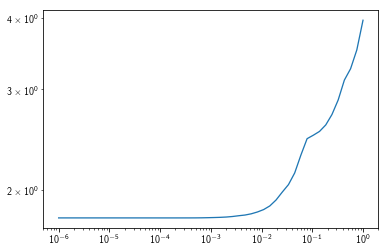

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
240 / 30000 iterations
applying cutoff
... took 54.48630057100672 seconds
(g,i)=(2,3) ...
find hyperparameter
current_scores [1.85747443 1.85747433 1.85747427 1.85747421 1.85747439 1.85747493
 1.85747579 1.857477   1.8574787  1.8574811  1.85748447 1.85748823
 1.85749308 1.85750694 1.85753955 1.85760042 1.85769494 1.85780604
 1.8578928  1.85792354 1.85805274 1.85828075 1.85846793 1.8588057
 1.85930623 1.86024186 1.86163452 1.86378289 1.8672238  1.87148688
 1.87688573 1.88376681 1.89354713 1.90950636 1.93678349 1.98406265
 2.0484802  2.11851888 2.2145679  2.37262684 2.52529387 2.5508148
 2.58982072 2.65810617 2.76283272 2.

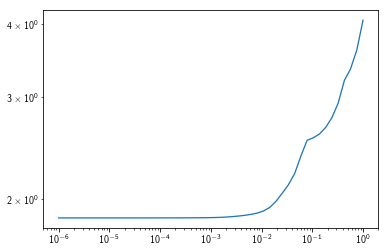

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.3299518105153717e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
281 / 30000 iterations
applying cutoff
... took 62.736642127041705 seconds
(g,i)=(2,4) ...
find hyperparameter
current_scores [1.76696387 1.76696389 1.76696393 1.76696396 1.76696404 1.76696426
 1.76696442 1.76696432 1.76696394 1.76696163 1.76696082 1.76695864
 1.7669504  1.76694268 1.76694036 1.76692955 1.7668902  1.76679821
 1.76661003 1.76634006 1.76606884 1.76590169 1.76568823 1.76551965
 1.76568035 1.76596513 1.76662681 1.76835294 1.77163105 1.77693152
 1.78497852 1.79756585 1.80956023 1.82691258 1.85513643 1.89764631
 1.95226908 2.00934824 2.1092529  2.28102433 2.40876679 2.43506811
 2.4744972  2.5436548  2.65701075

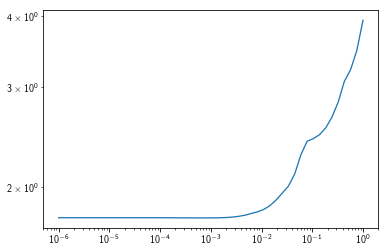

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0006551285568595509, lambda=1.0)!
status 0: Optimization terminated successfully.
235 / 30000 iterations
applying cutoff
... took 53.382810147013515 seconds
(g,i)=(2,5) ...
find hyperparameter
current_scores [1.78497288 1.78497202 1.78497088 1.78496938 1.7849674  1.78496492
 1.78496171 1.78495742 1.7849517  1.78494434 1.78493102 1.78490969
 1.78488153 1.78483839 1.78478464 1.78471178 1.78455697 1.78433896
 1.7841867  1.78424777 1.78443948 1.78470762 1.78483062 1.7852108
 1.78551941 1.78586026 1.78706126 1.78907419 1.79242223 1.79711573
 1.80205421 1.80970727 1.8214644  1.83865498 1.86821313 1.91643491
 1.95996942 2.01834669 2.12073545 2.27678428 2.39303251 2.42445599
 2.46087952 2.52518805 2.63264887 2

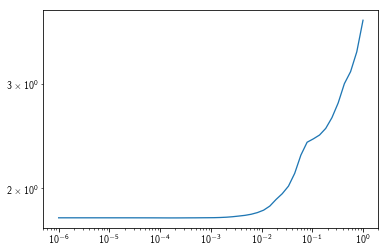

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
270 / 30000 iterations
applying cutoff
... took 60.53246680099983 seconds
(g,i)=(2,6) ...
find hyperparameter
current_scores [1.76902922 1.76902931 1.76902944 1.76902961 1.76902983 1.76903013
 1.76903054 1.76903109 1.76903184 1.76903288 1.76903433 1.76903637
 1.76903929 1.76904354 1.76904983 1.76905935 1.76907277 1.76907601
 1.76908581 1.76909987 1.76911859 1.76916229 1.76920158 1.76918986
 1.76929838 1.7699667  1.7712429  1.77293197 1.7752844  1.77885596
 1.78193379 1.78872984 1.79917871 1.81652832 1.84448476 1.88653666
 1.9306785  1.98604044 2.0894461  2.24962046 2.38705945 2.42357875
 2.47234398 2.53792262 2.64583254 

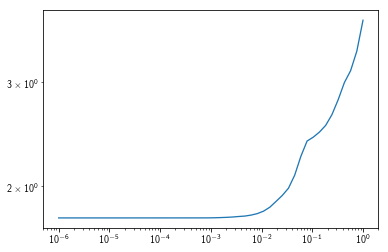

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
255 / 30000 iterations
applying cutoff
... took 56.166012634988874 seconds
(g,i)=(2,7) ...
find hyperparameter
current_scores [1.80056395 1.80056349 1.8005629  1.8005621  1.80056106 1.80055967
 1.80055786 1.80055548 1.80055296 1.80054998 1.80054479 1.80053703
 1.80052669 1.80051523 1.80050445 1.80049866 1.80050186 1.80052881
 1.80056846 1.80063343 1.80078433 1.80107897 1.80154346 1.80215157
 1.80275998 1.80356867 1.80494193 1.80717124 1.8110131  1.81793223
 1.82583226 1.83555683 1.84720948 1.8630925  1.88787335 1.92425194
 1.96582781 2.03084036 2.13782077 2.29624633 2.42425898 2.46201251
 2.501863   2.56981571 2.68434388 2.84860542 3.114

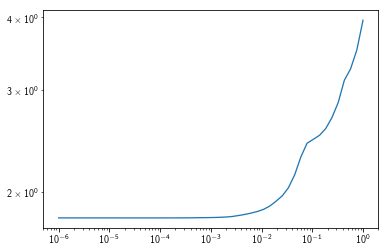

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=6.866488450042999e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
256 / 30000 iterations
applying cutoff
... took 58.264485348947346 seconds
(g,i)=(2,8) ...
find hyperparameter
current_scores [1.8166872  1.81668734 1.81668752 1.81668777 1.8166881  1.81668856
 1.81668917 1.81669008 1.81669135 1.81669377 1.81669693 1.81670179
 1.81671327 1.81673114 1.81675211 1.81676566 1.81677084 1.81677527
 1.8168781  1.81702269 1.81699571 1.81684085 1.81685798 1.81671914
 1.81708876 1.81844925 1.81981794 1.82120692 1.82426836 1.82924991
 1.83638239 1.84656867 1.85907371 1.87654192 1.90747025 1.95634809
 2.01472665 2.07677566 2.17791465 2.33425699 2.49231469 2.51922029
 2.55723558 2.62424091 2.73343858 

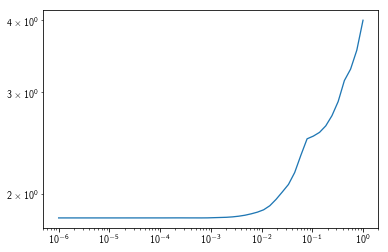

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
280 / 30000 iterations
applying cutoff
... took 63.27918139100075 seconds
(g,i)=(2,9) ...
find hyperparameter
current_scores [1.86757905 1.86757721 1.86757477 1.86757156 1.86756757 1.86756241
 1.86755562 1.86754641 1.86753414 1.86751886 1.86749843 1.86746913
 1.86742852 1.86737913 1.86732521 1.86727827 1.86724042 1.86723264
 1.86729444 1.86738259 1.86753763 1.86771922 1.86777624 1.86796355
 1.86825297 1.86878158 1.87011121 1.87246562 1.87669048 1.88252473
 1.88899028 1.89530224 1.90500047 1.92229365 1.95171611 1.99730471
 2.0465716  2.11066539 2.20791708 2.36527017 2.51567896 2.55061328
 2.59026151 2.65885452 2.77523616 2.94874317 3.2059

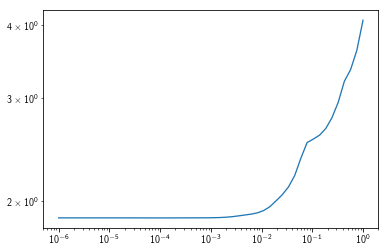

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00012067926406393288, lambda=1.0)!
status 0: Optimization terminated successfully.
275 / 30000 iterations
applying cutoff
... took 60.245116777019575 seconds
(g,i)=(5,0) ...
find hyperparameter
current_scores [0.73994576 0.73994569 0.7399456  0.73994542 0.73994504 0.73994455
 0.73994391 0.73994272 0.73994045 0.73993628 0.7399303  0.73992253
 0.73990771 0.73989021 0.73987407 0.73984375 0.739806   0.7397969
 0.73977983 0.73973921 0.73971609 0.73974631 0.7399174  0.74023881
 0.74088075 0.74172566 0.74283399 0.74489714 0.74779649 0.75273992
 0.76021744 0.7716998  0.78315822 0.79891622 0.8259119  0.87098069
 0.93278464 0.99734762 1.09658096 1.26474059 1.39976119 1.43330469
 1.47212238 1.54032644 1.65054621 

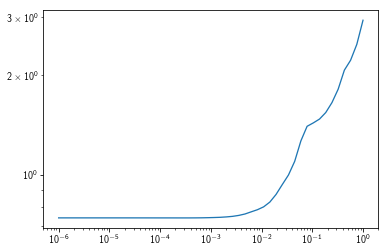

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
266 / 30000 iterations
applying cutoff
... took 60.07395789900329 seconds
(g,i)=(5,1) ...
find hyperparameter
current_scores [0.72390816 0.72390869 0.72390941 0.72391036 0.72391218 0.72391466
 0.72391801 0.72392243 0.72392821 0.72393589 0.7239471  0.72396031
 0.72397684 0.72400143 0.72402872 0.72403658 0.72402588 0.72402852
 0.7239879  0.72393396 0.72395199 0.72405359 0.72416386 0.72423937
 0.72442386 0.72485993 0.72559344 0.72729846 0.73068681 0.73662225
 0.74535594 0.75608002 0.77022305 0.78797288 0.81535065 0.86119666
 0.91150107 0.97245593 1.07384288 1.24099855 1.38998139 1.42490503
 1.46435674 1.53309019 1.64685027 1

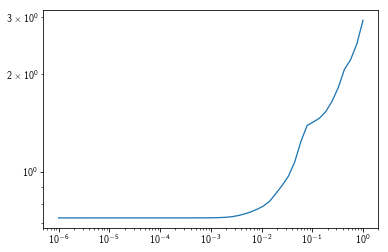

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
281 / 30000 iterations
applying cutoff
... took 65.1274931509979 seconds
(g,i)=(5,2) ...
find hyperparameter
current_scores [0.72964068 0.72964115 0.72964177 0.7296426  0.72964371 0.72964522
 0.72964714 0.7296497  0.72965321 0.72965798 0.72966448 0.72967293
 0.72968658 0.72970579 0.72973746 0.7297847  0.72985649 0.72996048
 0.7301227  0.73037302 0.7306576  0.7308572  0.73134663 0.73153954
 0.73194868 0.73256888 0.73370666 0.73570929 0.73925172 0.74566326
 0.75357202 0.76190422 0.77417391 0.79240703 0.8208167  0.86432857
 0.92403139 0.98695052 1.08626797 1.24861362 1.40976703 1.44337883
 1.48365599 1.55449831 1.67277457 1.84481777 2.12688

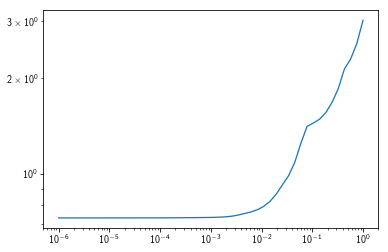

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
276 / 30000 iterations
applying cutoff
... took 62.57805663300678 seconds
(g,i)=(5,3) ...
find hyperparameter
current_scores [0.73100233 0.73100213 0.73100203 0.73100193 0.7310018  0.73100155
 0.73100129 0.73100167 0.73100104 0.73099982 0.73099837 0.73099908
 0.7310049  0.73101771 0.73103045 0.73102665 0.73100743 0.73098905
 0.73098014 0.73096009 0.73093834 0.73097073 0.73115702 0.73135591
 0.7318414  0.73262689 0.73398826 0.73571815 0.73895922 0.74537521
 0.7547211  0.76643711 0.77859713 0.79612234 0.82481168 0.86313841
 0.90607601 0.96794555 1.07265625 1.25270304 1.39618567 1.4312536
 1.46933615 1.53596828 1.64544567 1.80468916 2.03505

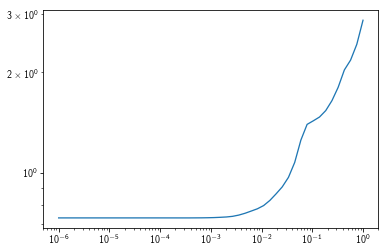

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
274 / 30000 iterations
applying cutoff
... took 66.08260972204152 seconds
(g,i)=(5,4) ...
find hyperparameter
current_scores [0.73900883 0.73900885 0.73900888 0.73900892 0.73900897 0.73900905
 0.739009   0.73900883 0.73900861 0.7390084  0.7390082  0.73900809
 0.73900773 0.7390072  0.73900753 0.73901405 0.7390321  0.73907403
 0.73914882 0.73926085 0.73937016 0.73946131 0.73961826 0.73991735
 0.74068604 0.74177686 0.74303048 0.74494935 0.74823401 0.75394607
 0.76323698 0.77513805 0.78426545 0.79954501 0.82613754 0.87233843
 0.93190434 0.99885023 1.09579599 1.25142114 1.40555865 1.43920903
 1.47810691 1.5457556  1.65735125 1

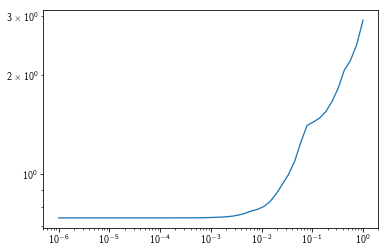

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.906939937054621e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
287 / 30000 iterations
applying cutoff
... took 64.74035785906017 seconds
(g,i)=(5,5) ...
find hyperparameter
current_scores [0.72234543 0.72234464 0.72234359 0.7223422  0.72234037 0.7223386
 0.72233635 0.72233327 0.72232923 0.72232428 0.72231786 0.72230948
 0.72229687 0.72227874 0.72225809 0.72223247 0.722217   0.72221656
 0.72225355 0.72232553 0.72247886 0.7227084  0.72281905 0.72292636
 0.72311868 0.72376106 0.72512435 0.72743594 0.73125683 0.73736439
 0.74607951 0.75802623 0.77092574 0.78996136 0.81946642 0.86503928
 0.91251878 0.9701229  1.07197037 1.22989641 1.37243454 1.40565528
 1.44475668 1.51274404 1.6273786  1.

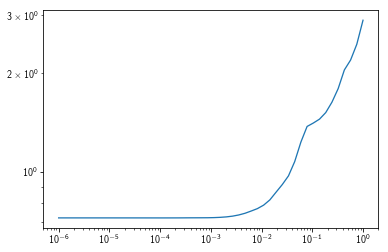

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00012067926406393288, lambda=1.0)!
status 0: Optimization terminated successfully.
268 / 30000 iterations
applying cutoff
... took 60.600757624953985 seconds
(g,i)=(5,6) ...
find hyperparameter
current_scores [0.74229775 0.74229831 0.74229906 0.74230005 0.74230137 0.74230313
 0.74230532 0.74230818 0.74231201 0.74231698 0.74232625 0.74233747
 0.74234703 0.74235363 0.74235038 0.74236254 0.74238002 0.74240573
 0.74233685 0.74231633 0.74235748 0.74245277 0.74257445 0.74280707
 0.74302205 0.74363634 0.74471432 0.74659285 0.74914199 0.75302632
 0.75902354 0.76813766 0.7788728  0.79574047 0.82523753 0.87122086
 0.92744445 0.98821925 1.08295076 1.24043428 1.40799855 1.4436319
 1.48157529 1.54797035 1.65929385 

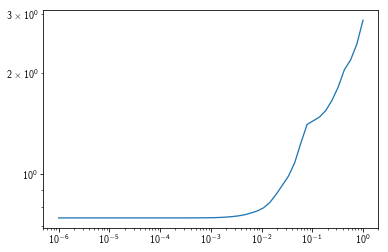

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
286 / 30000 iterations
applying cutoff
... took 63.09949631302152 seconds
(g,i)=(5,7) ...
find hyperparameter
current_scores [0.76347606 0.7634759  0.7634757  0.76347542 0.76347507 0.76347461
 0.76347403 0.76347332 0.76347281 0.76347225 0.7634719  0.76347267
 0.76347487 0.76347726 0.76348641 0.7635016  0.76350277 0.76346489
 0.7634102  0.76328312 0.76315382 0.76314424 0.76336026 0.76377827
 0.76476479 0.76601912 0.76749293 0.76991962 0.77378121 0.77975457
 0.78819285 0.79454109 0.80376764 0.81988529 0.84653282 0.89120841
 0.96491323 1.02988388 1.1275525  1.28361311 1.45660735 1.48929768
 1.52845474 1.5970617  1.70965913 1.87210671 2.1165

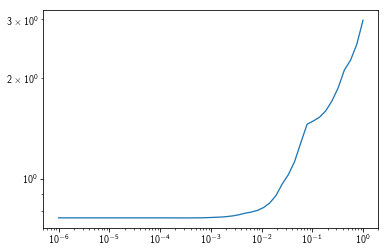

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0003727593720314938, lambda=1.0)!
status 0: Optimization terminated successfully.
265 / 30000 iterations
applying cutoff
... took 60.40779195795767 seconds
(g,i)=(5,8) ...
find hyperparameter
current_scores [0.73018071 0.73018078 0.73018087 0.73018099 0.73018116 0.73018138
 0.73018173 0.73018222 0.73018291 0.7301841  0.73018598 0.73018913
 0.73019433 0.73020122 0.73021161 0.73022721 0.73025066 0.73029569
 0.73040416 0.73035483 0.73048211 0.73074458 0.73121581 0.73174354
 0.73261711 0.73332873 0.73441516 0.73563346 0.73815125 0.7416769
 0.7469528  0.75522066 0.76514951 0.78075878 0.80803994 0.85354612
 0.90945133 0.96965891 1.06234111 1.22317919 1.3727188  1.40932802
 1.44874341 1.51398887 1.62248451 1.

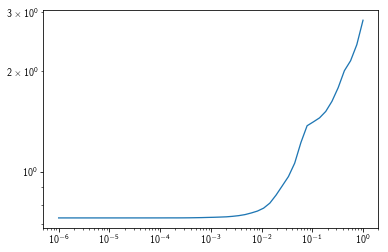

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
272 / 30000 iterations
applying cutoff
... took 62.79458907607477 seconds
(g,i)=(5,9) ...
find hyperparameter
current_scores [0.75129031 0.75128899 0.75128711 0.75128428 0.7512804  0.7512753
 0.75126857 0.75125957 0.7512473  0.75123089 0.75120968 0.75118195
 0.75114432 0.75109543 0.75104284 0.75098916 0.75093301 0.75087903
 0.75087158 0.75086187 0.75091407 0.75103916 0.75134486 0.75163387
 0.75193813 0.75281649 0.75457393 0.75709376 0.75996969 0.76381157
 0.76985366 0.77893731 0.7884576  0.80416205 0.83160211 0.87977868
 0.94038352 1.01218567 1.11336669 1.27618255 1.4200263  1.44775248
 1.48603752 1.55341268 1.66117334 1.82071726 2.05971

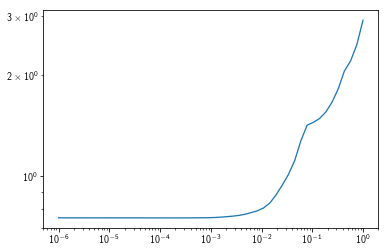

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00021209508879201905, lambda=1.0)!
status 0: Optimization terminated successfully.
262 / 30000 iterations
applying cutoff
... took 59.77802323107608 seconds
(g,i)=(10,0) ...
find hyperparameter
current_scores [0.36700135 0.36700043 0.36699912 0.36699738 0.36699519 0.3669922
 0.36698796 0.36698111 0.36697243 0.36695985 0.36694437 0.36692848
 0.36690791 0.36688664 0.36686751 0.3668474  0.36681566 0.36675627
 0.36670346 0.36666907 0.36669728 0.3668626  0.36699688 0.36719871
 0.3676493  0.36840599 0.36985573 0.37241689 0.37625524 0.38280917
 0.39060818 0.39923509 0.41038633 0.42792231 0.45702396 0.5003493
 0.55254598 0.6158405  0.71976083 0.89359264 1.05869908 1.09044773
 1.12937865 1.19780322 1.31169968 1

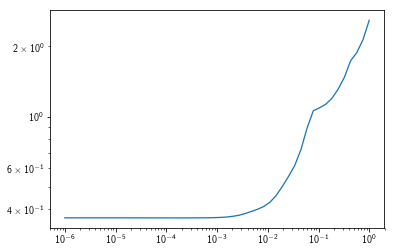

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00021209508879201905, lambda=1.0)!
status 0: Optimization terminated successfully.
282 / 30000 iterations
applying cutoff
... took 66.52591042802669 seconds
(g,i)=(10,1) ...
find hyperparameter
current_scores [0.37997086 0.37997126 0.37997176 0.37997243 0.37997331 0.3799745
 0.37997607 0.3799781  0.37998003 0.37998194 0.37998348 0.37998374
 0.37998313 0.37997612 0.37996608 0.37998115 0.38002653 0.38007577
 0.38013772 0.38029007 0.38048422 0.38095958 0.38124334 0.38149799
 0.3818463  0.38251896 0.38363318 0.38557389 0.38888898 0.39366368
 0.40061259 0.41048627 0.41997768 0.43659246 0.46579404 0.51218621
 0.56742487 0.62894677 0.73084166 0.89594874 1.05044412 1.07917309
 1.1171393  1.18380173 1.29284468 

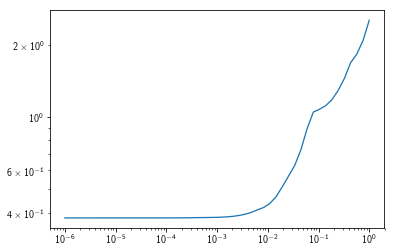

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.1794746792312125e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
287 / 30000 iterations
applying cutoff
... took 62.73469020903576 seconds
(g,i)=(10,2) ...
find hyperparameter
current_scores [0.36807857 0.36807896 0.36807949 0.3680802  0.36808114 0.3680824
 0.36808409 0.36808638 0.36808949 0.36809445 0.36810149 0.36811243
 0.36812996 0.36816214 0.36820286 0.3682391  0.36825356 0.36823241
 0.368233   0.36837773 0.36853895 0.36860802 0.36880742 0.36907547
 0.36957205 0.37016902 0.37129211 0.37329211 0.37681263 0.38218875
 0.38841957 0.39750555 0.4074734  0.42426605 0.45347258 0.49777626
 0.54983769 0.60982108 0.7134619  0.87967802 1.02431406 1.05480105
 1.09320997 1.15954152 1.27222354 

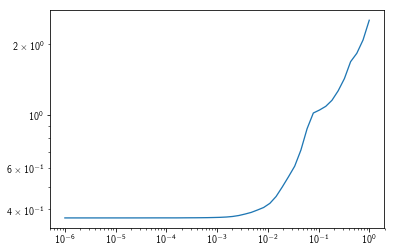

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
297 / 30000 iterations
applying cutoff
... took 67.01920995197725 seconds
(g,i)=(10,3) ...
find hyperparameter
current_scores [0.36691937 0.3669197  0.36692014 0.36692072 0.36692151 0.36692278
 0.3669247  0.36692807 0.36693302 0.36694066 0.36695186 0.3669654
 0.36698333 0.36697138 0.36695001 0.36692967 0.36689947 0.36689457
 0.36693761 0.36701698 0.36708629 0.36707267 0.36715487 0.36740342
 0.3678311  0.36844194 0.36957656 0.37129893 0.37427083 0.37937309
 0.38600782 0.39508183 0.40610901 0.42352723 0.45295789 0.49552695
 0.53835536 0.60007104 0.70321005 0.8711853  1.03408974 1.06598255
 1.10468524 1.17293487 1.28843443 1.45195907 1.6912

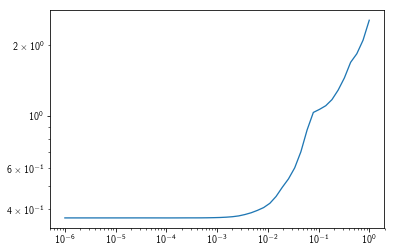

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00012067926406393288, lambda=1.0)!
status 0: Optimization terminated successfully.
301 / 30000 iterations
applying cutoff
... took 66.41146788396873 seconds
(g,i)=(10,4) ...
find hyperparameter
current_scores [0.37203956 0.37203999 0.37204056 0.37204133 0.37204235 0.3720437
 0.37204573 0.37204858 0.37205249 0.37205732 0.37206289 0.37207227
 0.37208897 0.37211508 0.37215274 0.37219755 0.37221962 0.37222448
 0.37226042 0.37228877 0.37222713 0.3722394  0.37236814 0.37260717
 0.37302773 0.3737675  0.37506848 0.37736144 0.38083995 0.38614886
 0.39237259 0.40138338 0.41139493 0.42873109 0.45894802 0.50289345
 0.55514194 0.61766484 0.72143137 0.89236647 1.05562761 1.09069774
 1.12968385 1.1981697  1.31110528 

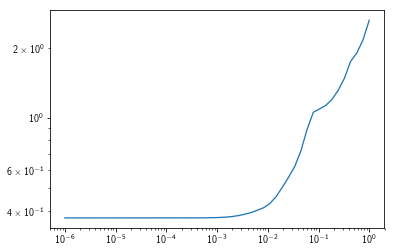

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
301 / 30000 iterations
applying cutoff
... took 67.68739426298998 seconds
(g,i)=(10,5) ...
find hyperparameter
current_scores [0.38321703 0.38321641 0.38321563 0.3832146  0.38321319 0.38321136
 0.3832092  0.38320659 0.38320247 0.38319662 0.38318725 0.38317517
 0.38315678 0.38313132 0.38311071 0.3831246  0.3831742  0.38318566
 0.38323043 0.38331162 0.38336855 0.38344434 0.38356542 0.38381493
 0.38418186 0.38486576 0.38613726 0.38827985 0.39175997 0.39728649
 0.40461384 0.41314414 0.4229323  0.43880685 0.4663434  0.51384581
 0.56465738 0.62424752 0.72430331 0.89156695 1.05477968 1.08714692
 1.12550143 1.19283444 1.30431196 1.4651062  1.723

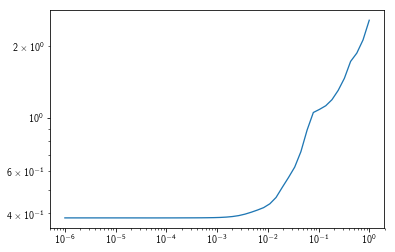

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.1794746792312125e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
316 / 30000 iterations
applying cutoff
... took 72.50677324493881 seconds
(g,i)=(10,6) ...
find hyperparameter
current_scores [0.37565248 0.37565223 0.37565191 0.37565146 0.37565085 0.37565006
 0.37564903 0.37564771 0.37564605 0.37564395 0.37564188 0.3756386
 0.37563234 0.37562398 0.37560951 0.37558933 0.37557655 0.37560665
 0.37568613 0.37581324 0.37597484 0.37605445 0.37618853 0.37643728
 0.37690001 0.37756155 0.37882753 0.38097186 0.38414697 0.38905471
 0.39672024 0.40834754 0.41988671 0.43696252 0.46539878 0.51007921
 0.56263471 0.62000498 0.71979896 0.88447954 1.03549872 1.06845225
 1.10670527 1.17296322 1.28513248 

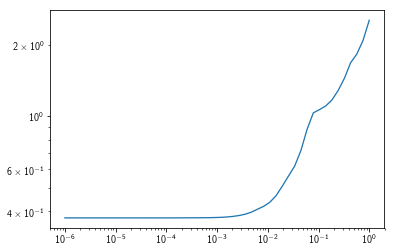

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
294 / 30000 iterations
applying cutoff
... took 66.47792689094786 seconds
(g,i)=(10,7) ...
find hyperparameter
current_scores [0.37164047 0.37164122 0.37164221 0.37164353 0.37164517 0.37164756
 0.37165021 0.37165299 0.37165594 0.3716598  0.37166445 0.37167304
 0.37168805 0.37171714 0.37176607 0.37182222 0.37183471 0.37181581
 0.37182398 0.37183874 0.37196671 0.37211613 0.37238658 0.3727054
 0.37311281 0.3738512  0.37527033 0.37720486 0.38061107 0.38646707
 0.39435453 0.40433657 0.41677888 0.43368752 0.46251893 0.50775208
 0.55691325 0.61849936 0.71700656 0.88047062 1.0252722  1.06045141
 1.09951251 1.16766563 1.28018735 1

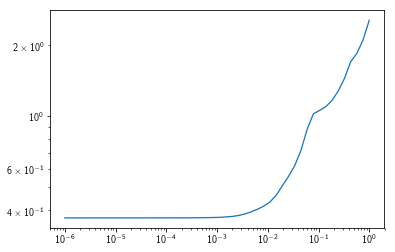

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
306 / 30000 iterations
applying cutoff
... took 68.88277600205038 seconds
(g,i)=(10,8) ...
find hyperparameter
current_scores [0.36737537 0.36737465 0.36737365 0.36737233 0.36737074 0.36736874
 0.36736615 0.36736326 0.36736058 0.36736026 0.36736033 0.36735963
 0.36735685 0.36735206 0.36734972 0.3673572  0.36737433 0.36741903
 0.36746628 0.36751687 0.36758873 0.36766135 0.36778743 0.36808583
 0.36860238 0.36929294 0.37053965 0.37288486 0.37687183 0.38238783
 0.39087351 0.39789107 0.40748602 0.42433422 0.45311118 0.49905311
 0.55246718 0.61318208 0.71431421 0.8788729  1.01633528 1.04868275
 1.08780558 1.15637029 1.26984419 1.43295744 1.689

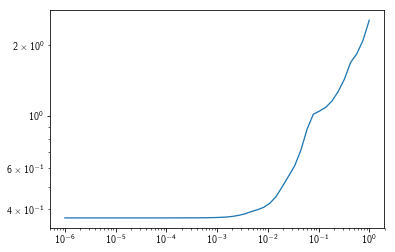

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.1794746792312125e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
295 / 30000 iterations
applying cutoff
... took 67.74118959903717 seconds
(g,i)=(10,9) ...
find hyperparameter
current_scores [0.36288906 0.36288852 0.36288781 0.36288689 0.36288569 0.3628841
 0.36288213 0.36288031 0.36287815 0.36287523 0.36287165 0.36286728
 0.36286209 0.36285528 0.36284526 0.3628322  0.36281126 0.36278175
 0.36274938 0.3627009  0.36265026 0.36270048 0.36285104 0.3631531
 0.36377343 0.36473477 0.36614837 0.36833591 0.37165706 0.37614123
 0.38294802 0.39436028 0.40624718 0.42348207 0.45376761 0.50205667
 0.56249531 0.6227453  0.72286679 0.89087298 1.04296695 1.07702906
 1.11552223 1.18308684 1.29540898 1

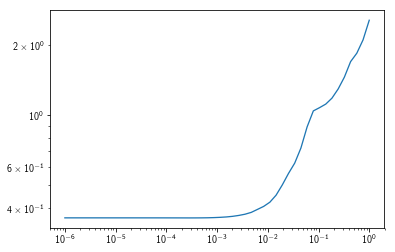

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0002811768697974231, lambda=1.0)!
status 0: Optimization terminated successfully.
272 / 30000 iterations
applying cutoff
... took 61.23455373896286 seconds
(g,i)=(20,0) ...
find hyperparameter
current_scores [0.19488996 0.19488922 0.19488822 0.19488693 0.19488523 0.19488294
 0.1948799  0.19487618 0.19487187 0.19486677 0.19486059 0.19485513
 0.19484788 0.19483924 0.19482917 0.19482226 0.19482068 0.19480599
 0.19480006 0.19484134 0.19489927 0.19505081 0.19531924 0.195631
 0.19613371 0.19698392 0.19832137 0.20052135 0.20414596 0.20978721
 0.21714233 0.22585749 0.23611582 0.25310093 0.2819658  0.32768935
 0.37941259 0.44040717 0.54225503 0.70752758 0.86715103 0.89996322
 0.93864226 1.00654621 1.11996353 1.

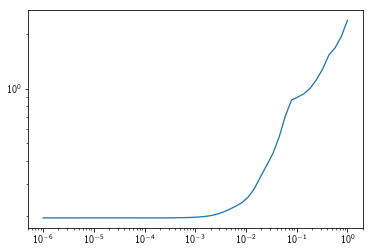

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00015998587196060574, lambda=1.0)!
status 0: Optimization terminated successfully.
289 / 30000 iterations
applying cutoff
... took 65.25439095997717 seconds
(g,i)=(20,1) ...
find hyperparameter
current_scores [0.18978188 0.18978221 0.18978266 0.18978319 0.18978419 0.18978568
 0.18978782 0.18979135 0.18979589 0.18980138 0.18980889 0.18981565
 0.18981935 0.18982449 0.18983656 0.18984088 0.18984531 0.18984026
 0.1898607  0.18989058 0.18991873 0.18998034 0.19019054 0.19049181
 0.19100766 0.19178772 0.19310326 0.19538163 0.19898659 0.20531177
 0.21306162 0.22350307 0.23408025 0.25126029 0.28109175 0.32742639
 0.38447968 0.44539766 0.54623307 0.70927042 0.8684483  0.90421764
 0.94355681 1.01211152 1.12590824

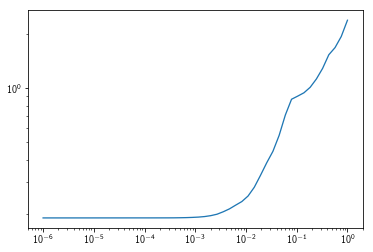

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
315 / 30000 iterations
applying cutoff
... took 68.5888390711043 seconds
(g,i)=(20,2) ...
find hyperparameter
current_scores [0.18819131 0.18819074 0.18819006 0.1881891  0.18818778 0.18818589
 0.18818401 0.18818229 0.18818015 0.18817666 0.18817349 0.18817092
 0.18816519 0.18815901 0.18815852 0.18814034 0.18817087 0.18823498
 0.18824615 0.18832442 0.18843581 0.18859597 0.18878063 0.18909052
 0.18953707 0.19024338 0.19149865 0.19369545 0.1975386  0.20281812
 0.20943113 0.21662369 0.2266155  0.24415394 0.27377382 0.31908114
 0.37137329 0.43171982 0.53445059 0.704144   0.86009207 0.89581791
 0.93499539 1.00239347 1.11412581 1.27535446 1.5076

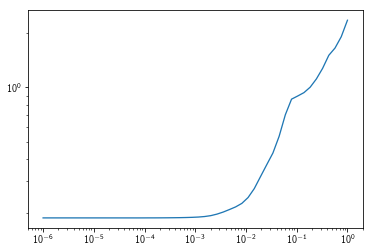

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=6.866488450042999e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
315 / 30000 iterations
applying cutoff
... took 68.5909434639616 seconds
(g,i)=(20,3) ...
find hyperparameter
current_scores [0.18947023 0.18947037 0.18947058 0.18947086 0.18947115 0.18947149
 0.18947237 0.18947346 0.18947456 0.1894758  0.18947704 0.18947761
 0.18947934 0.18947381 0.18945287 0.18944113 0.18942561 0.18944046
 0.18946901 0.18950583 0.18957676 0.18970381 0.18989318 0.19014852
 0.19061627 0.19142187 0.19272962 0.19502332 0.19895175 0.2051846
 0.21325677 0.22363088 0.23512222 0.25223548 0.28227728 0.32720055
 0.37606655 0.4354635  0.53712198 0.70701294 0.85112994 0.88631417
 0.92540565 0.99337933 1.10750241 1.

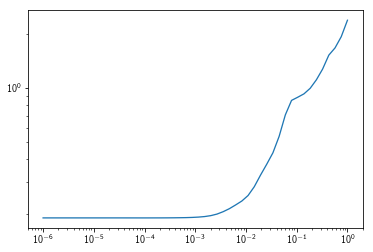

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
303 / 30000 iterations
applying cutoff
... took 65.97345025104005 seconds
(g,i)=(20,4) ...
find hyperparameter
current_scores [0.18816851 0.18816784 0.18816696 0.18816593 0.1881647  0.18816332
 0.18816181 0.18815988 0.18815732 0.1881536  0.18814914 0.18814144
 0.18812985 0.18811926 0.18811222 0.18811388 0.1881175  0.18812037
 0.18813436 0.18817161 0.18825842 0.18845303 0.18873183 0.18918331
 0.18980779 0.19064295 0.19197342 0.19405011 0.19763748 0.20377574
 0.21270206 0.22194773 0.23171662 0.24831913 0.27615865 0.32128279
 0.37565397 0.43529474 0.53514461 0.69808994 0.8427126  0.87716384
 0.9160405  0.98347996 1.09708177 

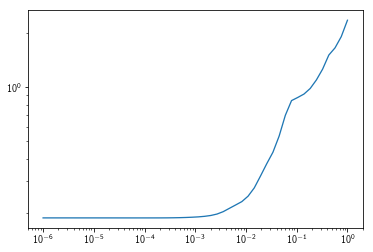

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.1794746792312125e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
307 / 30000 iterations
applying cutoff
... took 68.55905998509843 seconds
(g,i)=(20,5) ...
find hyperparameter
current_scores [0.18412711 0.18412687 0.18412654 0.18412607 0.18412533 0.18412431
 0.18412294 0.18412056 0.18411579 0.18410973 0.18410366 0.18409867
 0.18410174 0.18410968 0.18411778 0.18412565 0.184142   0.18418243
 0.18422971 0.18426259 0.1843188  0.18442275 0.18464716 0.18500614
 0.18547401 0.18622473 0.18756389 0.18974913 0.19342151 0.19979777
 0.20753855 0.21645643 0.22673943 0.24321713 0.27157743 0.31647859
 0.37022368 0.43236003 0.53572991 0.70580608 0.84957116 0.88213643
 0.92101746 0.98934218 1.10216046

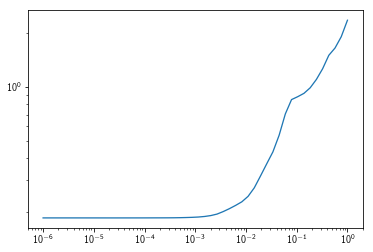

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.2229964825261955e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
323 / 30000 iterations
applying cutoff
... took 70.56990953593049 seconds
(g,i)=(20,6) ...
find hyperparameter
current_scores [0.18299731 0.18299709 0.18299678 0.18299643 0.18299618 0.18299567
 0.18299541 0.18299476 0.18299341 0.18299167 0.18298825 0.18298369
 0.18298275 0.18298683 0.18299234 0.18299934 0.18301293 0.18304073
 0.18308495 0.1831571  0.18326176 0.18338249 0.18356795 0.18378043
 0.18421416 0.18493629 0.18617548 0.18831793 0.19171952 0.19670386
 0.20355251 0.21305714 0.22303091 0.2396542  0.26856558 0.31451487
 0.36665033 0.42784016 0.52769284 0.69546515 0.84219965 0.87382347
 0.9120002  0.97913911 1.09173967

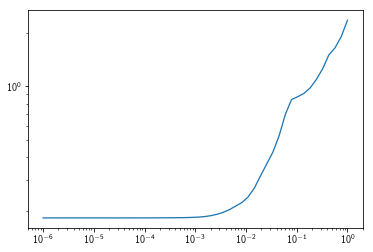

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.94705170255181e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
309 / 30000 iterations
applying cutoff
... took 68.06796841102187 seconds
(g,i)=(20,7) ...
find hyperparameter
current_scores [0.18270043 0.18269965 0.18269861 0.18269725 0.18269544 0.18269269
 0.18268873 0.18268358 0.18267725 0.18266948 0.18265877 0.18264232
 0.18262124 0.18259957 0.18257735 0.18256181 0.18255619 0.1825693
 0.18259081 0.18261837 0.18267731 0.18278178 0.18294235 0.18320849
 0.18371245 0.18459604 0.18599337 0.18809907 0.19175194 0.19750677
 0.20596263 0.2178564  0.22883812 0.24591388 0.27592902 0.32262053
 0.36974848 0.42997738 0.53052811 0.6963186  0.84095309 0.87114105
 0.90951824 0.97696891 1.08999006 1.

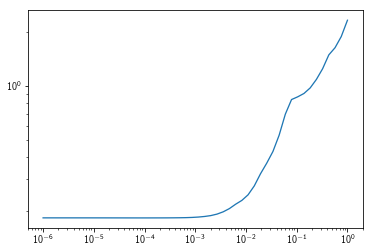

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
297 / 30000 iterations
applying cutoff
... took 64.80583234794904 seconds
(g,i)=(20,8) ...
find hyperparameter
current_scores [0.18570611 0.18570676 0.18570764 0.18570884 0.18571038 0.18571258
 0.18571623 0.18572081 0.1857263  0.18573288 0.1857419  0.18574916
 0.18575344 0.18575071 0.18572772 0.18570231 0.18570827 0.18571574
 0.18573917 0.18578183 0.18584112 0.18593744 0.18608154 0.18635273
 0.1867888  0.18753658 0.18883223 0.19085045 0.19430147 0.20002215
 0.20741438 0.21734914 0.22836494 0.24519834 0.27378244 0.31852149
 0.36642431 0.42705756 0.52897579 0.69911623 0.85934217 0.89264187
 0.9309246  0.99807304 1.11070442 

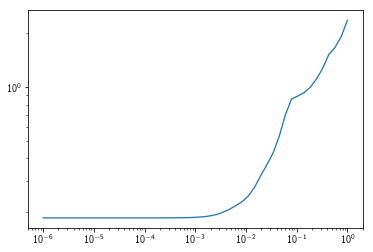

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=6.866488450042999e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
326 / 30000 iterations
applying cutoff
... took 70.99296290893108 seconds
(g,i)=(20,9) ...
find hyperparameter
current_scores [0.19232162 0.19232146 0.19232124 0.19232096 0.19232059 0.19231998
 0.19231896 0.19231763 0.19231617 0.19231522 0.19231462 0.19231597
 0.19231213 0.19230361 0.1922928  0.19227562 0.19226003 0.1922595
 0.19228634 0.19232071 0.19237388 0.1925     0.19269235 0.19302591
 0.19352999 0.1942347  0.19537003 0.19739529 0.20101115 0.20718315
 0.21446417 0.22581218 0.23647702 0.25292965 0.28085598 0.3262049
 0.38422076 0.4433428  0.5449758  0.71038482 0.8592779  0.89291177
 0.93195521 1.00016667 1.1137491  1.

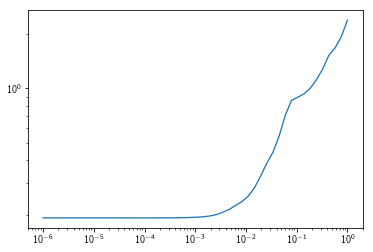

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.00012067926406393288, lambda=1.0)!
status 0: Optimization terminated successfully.
302 / 30000 iterations
applying cutoff
... took 67.54145476198755 seconds
(g,i)=(50,0) ...
find hyperparameter
current_scores [0.07551485 0.07551467 0.07551443 0.07551414 0.07551371 0.07551315
 0.0755124  0.07551149 0.07551062 0.07550999 0.07550922 0.0755075
 0.07550475 0.07549943 0.0754953  0.07548951 0.07548268 0.07548747
 0.0755045  0.07554496 0.07564018 0.07577454 0.07592059 0.07615111
 0.07656367 0.07729941 0.07860286 0.08092923 0.0846141  0.08939117
 0.09654143 0.10592911 0.11583556 0.13268985 0.16118812 0.20749203
 0.26232705 0.32403435 0.42552145 0.59150138 0.74618364 0.77700426
 0.81548971 0.88279725 0.99477901 

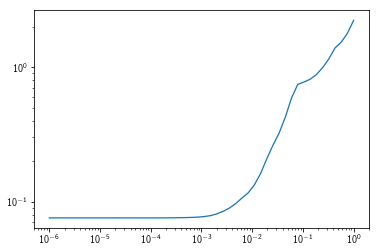

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
307 / 30000 iterations
applying cutoff
... took 70.10488005704246 seconds
(g,i)=(50,1) ...
find hyperparameter
current_scores [0.07618466 0.07618371 0.07618244 0.07618075 0.07617868 0.07617618
 0.07617305 0.07616899 0.076165   0.07616036 0.07615648 0.07615434
 0.07615383 0.07615462 0.07615436 0.07615593 0.07615529 0.07615518
 0.07619221 0.07624647 0.07630059 0.07638772 0.07655747 0.07686362
 0.07739289 0.07813997 0.0794497  0.08153756 0.08508105 0.09083839
 0.09922741 0.11014586 0.12056064 0.13754247 0.16658975 0.2132345
 0.26563756 0.32657619 0.4285819  0.5951651  0.74181445 0.77346621
 0.81209439 0.87960292 0.99234538 1

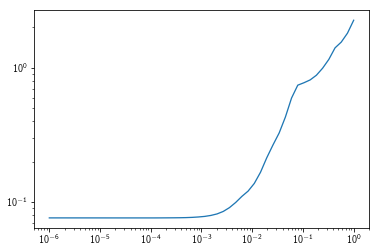

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.94705170255181e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
327 / 30000 iterations
applying cutoff
... took 73.918818978942 seconds
(g,i)=(50,2) ...
find hyperparameter
current_scores [0.07502402 0.07502365 0.0750231  0.07502238 0.07502151 0.07502057
 0.07501963 0.07501977 0.07502142 0.07502305 0.07501864 0.07500873
 0.07499289 0.07498407 0.07497984 0.07497517 0.07497091 0.07497173
 0.07498675 0.07503049 0.07509929 0.0751827  0.07535524 0.07565031
 0.07615216 0.07696007 0.07827678 0.08046327 0.0840796  0.08985005
 0.09715521 0.1071994  0.11742565 0.13423577 0.16323195 0.20898928
 0.26294147 0.32516566 0.42648149 0.59510119 0.74150311 0.7727836
 0.81185634 0.88045612 0.99461039 1.15

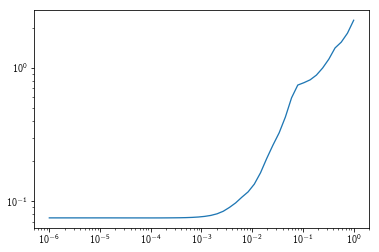

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
317 / 30000 iterations
applying cutoff
... took 70.25713137292769 seconds
(g,i)=(50,3) ...
find hyperparameter
current_scores [0.07639739 0.07639709 0.07639667 0.07639605 0.07639526 0.07639433
 0.07639323 0.076392   0.07639014 0.07638829 0.07638677 0.07638981
 0.07639482 0.07638712 0.0763804  0.07638262 0.07639747 0.07642652
 0.07645673 0.07652096 0.07658436 0.07670458 0.07688957 0.07720397
 0.07770727 0.07847131 0.07979313 0.081948   0.08557976 0.09176232
 0.10003956 0.11055684 0.12186789 0.13890585 0.16855593 0.21602418
 0.26819405 0.32910921 0.43155917 0.59891118 0.74221405 0.77481521
 0.81320358 0.88040341 0.99255333 

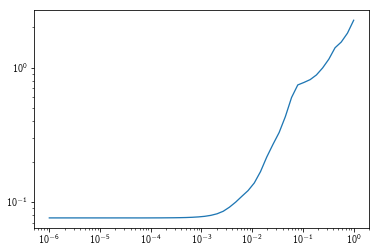

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.1794746792312125e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
323 / 30000 iterations
applying cutoff
... took 71.79744247801136 seconds
(g,i)=(50,4) ...
find hyperparameter
current_scores [0.07313248 0.07313225 0.07313197 0.07313177 0.07313177 0.07313213
 0.07313236 0.07313276 0.07313452 0.0731372  0.07313676 0.07313576
 0.07313833 0.07314664 0.07315458 0.07315352 0.07316441 0.07316954
 0.07319239 0.07324324 0.07335098 0.07349763 0.07366211 0.07394409
 0.0744456  0.07523583 0.07653812 0.07858398 0.0821578  0.08776717
 0.09542928 0.10490699 0.11610264 0.13278747 0.16209724 0.20900226
 0.26506218 0.32617279 0.4272259  0.59419775 0.74379044 0.77561489
 0.81439125 0.88249803 0.99671561

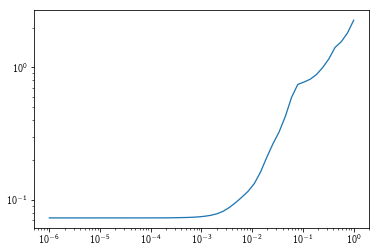

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.0888435964774785e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
335 / 30000 iterations
applying cutoff
... took 74.3476168550551 seconds
(g,i)=(50,5) ...
find hyperparameter
current_scores [0.07479606 0.0747961  0.07479615 0.07479616 0.07479619 0.07479611
 0.0747958  0.07479539 0.07479478 0.07479438 0.07479528 0.07479762
 0.0748008  0.07480398 0.07480562 0.07481441 0.07483813 0.07484713
 0.07485383 0.07488082 0.07496162 0.07507068 0.07519888 0.07542249
 0.07584307 0.07659733 0.07789566 0.08018331 0.08377996 0.08999879
 0.09775023 0.10726229 0.11762592 0.1345358  0.16367366 0.20931194
 0.26133311 0.32238174 0.42366336 0.58761297 0.74151622 0.77244482
 0.81076474 0.8778372  0.99003412 

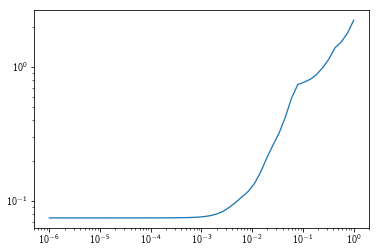

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.2648552168552958e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
319 / 30000 iterations
applying cutoff
... took 71.87422585499007 seconds
(g,i)=(50,6) ...
find hyperparameter
current_scores [0.07812754 0.0781268  0.07812589 0.07812477 0.07812335 0.07812155
 0.07811981 0.07811803 0.07811577 0.07811268 0.07810869 0.07810534
 0.07810568 0.07810771 0.07811279 0.07812914 0.07813062 0.07813287
 0.07816532 0.07821912 0.07829441 0.07843169 0.07858297 0.07887087
 0.07931197 0.08008909 0.08145031 0.083553   0.08719074 0.0934734
 0.10122258 0.11060358 0.12121352 0.13800547 0.16648135 0.21251772
 0.26848517 0.32948244 0.43018596 0.59835864 0.75090778 0.78209252
 0.82119275 0.88981136 1.00386733 

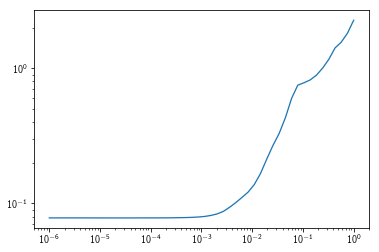

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.2229964825261955e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
325 / 30000 iterations
applying cutoff
... took 83.41225565399509 seconds
(g,i)=(50,7) ...
find hyperparameter
current_scores [0.0772007  0.07720071 0.07720074 0.07720074 0.07720062 0.0772005
 0.07720048 0.07720091 0.07720189 0.07720253 0.07720317 0.07720623
 0.07721278 0.07722485 0.07723805 0.07724462 0.07728609 0.07730884
 0.07731296 0.07733635 0.0774114  0.07754855 0.07774003 0.07800319
 0.07844317 0.07919731 0.08053215 0.08284337 0.08647123 0.09292073
 0.10163475 0.11176478 0.12353147 0.14088407 0.16976144 0.21520972
 0.26899028 0.33115523 0.43313264 0.60222243 0.74534387 0.77870677
 0.81766213 0.88597021 0.99911504 

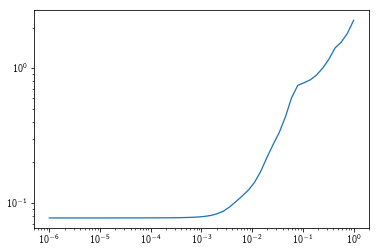

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.428675439323859e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
314 / 30000 iterations
applying cutoff
... took 74.86284532898571 seconds
(g,i)=(50,8) ...
find hyperparameter
current_scores [0.07252563 0.07252571 0.07252583 0.07252599 0.07252622 0.07252655
 0.07252714 0.07252819 0.07252941 0.07253096 0.07253328 0.07253412
 0.07252906 0.07252736 0.07252971 0.07252983 0.07252984 0.07253214
 0.07255091 0.07257176 0.07261931 0.07270428 0.07286079 0.07314208
 0.07361803 0.07434856 0.07563264 0.07788582 0.08151872 0.08775333
 0.09544452 0.10557504 0.11640685 0.13342547 0.16313302 0.20959207
 0.26179794 0.32247875 0.42342964 0.58938439 0.73798734 0.77077235
 0.80926293 0.87627562 0.98901226 

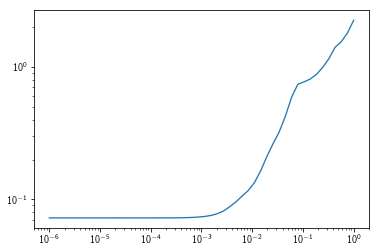

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
342 / 30000 iterations
applying cutoff
... took 74.78941183094867 seconds
(g,i)=(50,9) ...
find hyperparameter
current_scores [0.07411261 0.07411179 0.07411076 0.07410937 0.07410753 0.0741052
 0.07410219 0.07409873 0.07409499 0.07409115 0.07408677 0.07408329
 0.07408298 0.07408336 0.07408636 0.07409429 0.07411387 0.07414119
 0.07416428 0.07420075 0.07423934 0.07433197 0.07449588 0.0747649
 0.07519334 0.07594819 0.07726991 0.0793423  0.08292038 0.08895071
 0.09668854 0.10591476 0.11672233 0.13375411 0.16346103 0.20977633
 0.26034805 0.3215805  0.42416869 0.59146046 0.73802428 0.76950413
 0.80788979 0.8750522  0.98692564 1.14707666 1.39540

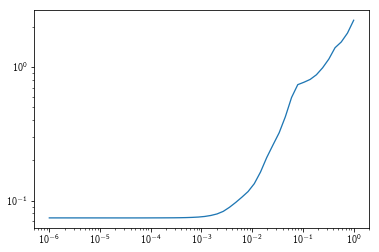

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.94705170255181e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
325 / 30000 iterations
applying cutoff
... took 74.55611324904021 seconds
(g,i)=(100,0) ...
find hyperparameter
current_scores [0.03699845 0.03699828 0.03699811 0.03699795 0.03699778 0.03699766
 0.03699762 0.03699721 0.03699684 0.03699622 0.03699099 0.03698736
 0.03698694 0.03699015 0.0369963  0.03700733 0.03702619 0.0370469
 0.0370723  0.0371147  0.03716671 0.0372569  0.03743073 0.0376941
 0.03813198 0.03889967 0.04025934 0.04260417 0.04627808 0.05243132
 0.06082096 0.07051107 0.08182271 0.09883276 0.12797923 0.17434923
 0.22689122 0.28843709 0.3903583  0.55797364 0.70580438 0.73796066
 0.77671812 0.84474377 0.95791073 1.

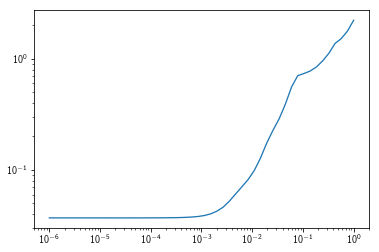

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.94705170255181e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
320 / 30000 iterations
applying cutoff
... took 72.29340416600462 seconds
(g,i)=(100,1) ...
find hyperparameter
current_scores [0.03738489 0.03738514 0.03738546 0.03738591 0.03738651 0.03738756
 0.03738946 0.03739231 0.03739742 0.03740195 0.03740093 0.0374012
 0.03740132 0.03740399 0.03741229 0.03742439 0.03743692 0.03745922
 0.03749185 0.03752823 0.03757299 0.03766221 0.03783345 0.03812647
 0.0386369  0.0394007  0.04072328 0.04276892 0.046314   0.05248857
 0.06114247 0.07056775 0.0818397  0.09858321 0.12762857 0.17460289
 0.22845532 0.2896726  0.3914947  0.55828984 0.703619   0.73598262
 0.77472424 0.84257964 0.95588326 1

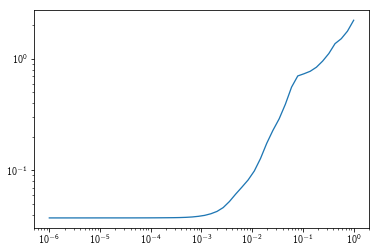

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
341 / 30000 iterations
applying cutoff
... took 76.8209522080142 seconds
(g,i)=(100,2) ...
find hyperparameter
current_scores [0.03760212 0.03760215 0.03760218 0.03760217 0.03760211 0.037602
 0.0376017  0.03760122 0.03760057 0.0375999  0.03759908 0.03759873
 0.03759589 0.03759582 0.03759389 0.03760266 0.0376287  0.03764805
 0.03768194 0.03774271 0.03780973 0.03790517 0.03807309 0.03836696
 0.03888996 0.03968818 0.04105736 0.0433506  0.0470333  0.05299963
 0.06108223 0.07091292 0.0821256  0.09911096 0.12825702 0.17369512
 0.22573453 0.28758902 0.38901909 0.55578793 0.70274448 0.73423964
 0.77293272 0.84072866 0.95357891 1.114822   1.36927

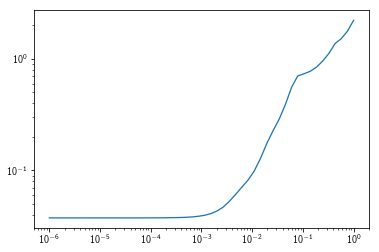

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.1794746792312125e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
327 / 30000 iterations
applying cutoff
... took 71.19222552806605 seconds
(g,i)=(100,3) ...
find hyperparameter
current_scores [0.03716182 0.03716117 0.03716027 0.03715913 0.03715776 0.03715651
 0.03715534 0.03715381 0.03715201 0.03714978 0.03714716 0.0371464
 0.03714831 0.03715187 0.037157   0.03716517 0.03716846 0.03716733
 0.03718893 0.03723604 0.03729307 0.03738204 0.03755921 0.03784339
 0.03828451 0.03905411 0.0403987  0.04246546 0.04603337 0.05229348
 0.06079407 0.07021957 0.08158299 0.09840922 0.12731358 0.17400044
 0.22838634 0.28903276 0.39052725 0.55890403 0.70326344 0.73376924
 0.77228116 0.83988989 0.95207502

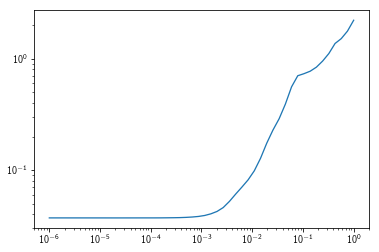

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.2229964825261955e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
332 / 30000 iterations
applying cutoff
... took 72.41956919792574 seconds
(g,i)=(100,4) ...
find hyperparameter
current_scores [0.03710873 0.03710917 0.03710963 0.03710997 0.03711016 0.03711022
 0.03711006 0.03711038 0.03711105 0.03711168 0.03711392 0.03711764
 0.03711774 0.0371085  0.03709513 0.03709279 0.03710072 0.03712189
 0.03716077 0.0372245  0.03732799 0.03744493 0.03761782 0.03791547
 0.03835722 0.03913166 0.04047836 0.04266097 0.04625543 0.05214211
 0.0602102  0.06983422 0.08098788 0.09792208 0.12686385 0.17267374
 0.22502946 0.28577595 0.38650457 0.55040835 0.69931501 0.73171054
 0.77052565 0.83834399 0.9519226

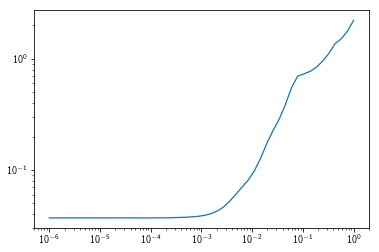

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=6.866488450042999e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
323 / 30000 iterations
applying cutoff
... took 71.14446260803379 seconds
(g,i)=(100,5) ...
find hyperparameter
current_scores [0.03911527 0.03911511 0.03911491 0.0391147  0.03911446 0.03911415
 0.03911381 0.03911354 0.03911342 0.03911418 0.03911561 0.03911614
 0.03911351 0.03911328 0.03911771 0.0391217  0.03912849 0.03914271
 0.03916717 0.03921233 0.03926324 0.03936127 0.03953338 0.03983271
 0.04033119 0.0410952  0.04242116 0.04448403 0.04811349 0.05439179
 0.06236145 0.07240538 0.08381541 0.10089018 0.13003381 0.17776648
 0.22834286 0.28999735 0.39259677 0.55931388 0.70335937 0.73578439
 0.77492077 0.84349067 0.95780419

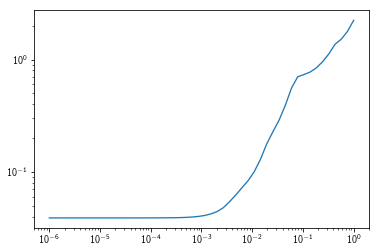

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.906939937054621e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
317 / 30000 iterations
applying cutoff
... took 71.91668067406863 seconds
(g,i)=(100,6) ...
find hyperparameter
current_scores [0.03775766 0.03775761 0.03775724 0.03775699 0.0377561  0.03775432
 0.0377522  0.03774992 0.03774995 0.03775026 0.03774938 0.03774849
 0.03774556 0.03773896 0.03773876 0.03774684 0.03775523 0.03776851
 0.0377948  0.03783606 0.03791741 0.03802947 0.03817047 0.03840549
 0.03882189 0.03955662 0.04085748 0.04291721 0.04645571 0.05234341
 0.05988039 0.06928911 0.08059244 0.09752348 0.12713663 0.17273249
 0.2229794  0.28275776 0.38302828 0.54741809 0.69429009 0.72650213
 0.76500218 0.83254559 0.94552024

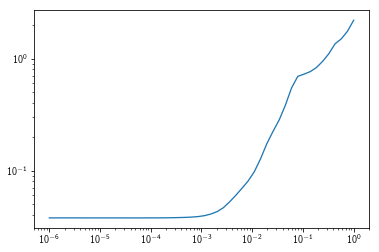

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.1794746792312125e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
326 / 30000 iterations
applying cutoff
... took 71.88355682604015 seconds
(g,i)=(100,7) ...
find hyperparameter
current_scores [0.03820684 0.03820679 0.03820679 0.03820683 0.03820702 0.03820751
 0.03820833 0.03820963 0.03821166 0.03821439 0.03821816 0.03822486
 0.03823656 0.0382498  0.03826202 0.03827004 0.03828504 0.03830067
 0.03832742 0.0383721  0.03841909 0.03851569 0.03868586 0.03898109
 0.03948854 0.04024994 0.04157827 0.04373343 0.04729635 0.0531672
 0.06071842 0.07046808 0.08115606 0.09808999 0.12706009 0.17275812
 0.22596811 0.28615192 0.38613572 0.5513994  0.70400797 0.73576315
 0.7743251  0.8420299  0.95499616

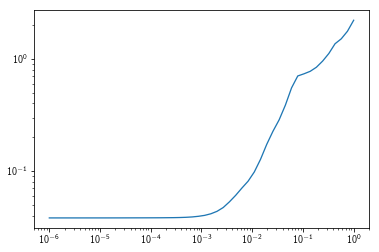

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.325711365590108e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
328 / 30000 iterations
applying cutoff
... took 74.81906296301167 seconds
(g,i)=(100,8) ...
find hyperparameter
current_scores [0.03697669 0.03697685 0.03697709 0.03697755 0.0369781  0.03697857
 0.03697908 0.03697933 0.03697948 0.03697966 0.03698175 0.03698534
 0.03698116 0.03697545 0.03696918 0.03696601 0.03697599 0.03700108
 0.03703765 0.03709464 0.03715461 0.03724813 0.03741172 0.03769776
 0.03813317 0.03888749 0.04021308 0.0423625  0.04590815 0.05213999
 0.06039537 0.07002246 0.08104416 0.09803239 0.12760819 0.17528184
 0.22864524 0.29007304 0.39201358 0.56014086 0.70988682 0.74194103
 0.78077718 0.84876021 0.96194716

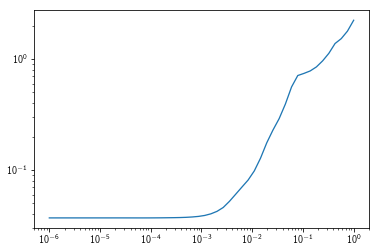

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=6.866488450042999e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
322 / 30000 iterations
applying cutoff
... took 70.74469688697718 seconds
(g,i)=(100,9) ...
find hyperparameter
current_scores [0.03708493 0.03708488 0.03708481 0.03708467 0.03708439 0.03708387
 0.0370826  0.03708122 0.03708051 0.03708004 0.03707664 0.03707282
 0.03707144 0.03707033 0.03706946 0.03706912 0.03706829 0.03707209
 0.03708335 0.03713829 0.03722681 0.03736737 0.03753335 0.03782645
 0.03834143 0.03911621 0.04046506 0.0425917  0.04623514 0.05235198
 0.06018792 0.06848265 0.07894289 0.09583907 0.12479309 0.17196039
 0.22425463 0.28532912 0.38661633 0.55376912 0.70698708 0.73901093
 0.77731332 0.84455094 0.95663896

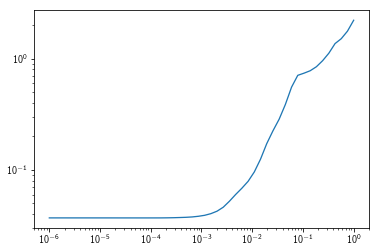

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.102981779915228e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
319 / 30000 iterations
applying cutoff
... took 72.67016601900104 seconds
(g,i)=(200,0) ...
find hyperparameter
current_scores [0.01798436 0.01798419 0.01798403 0.01798377 0.01798337 0.0179829
 0.01798129 0.01797878 0.01797595 0.01797503 0.01797421 0.01797294
 0.01797252 0.01797403 0.01797713 0.01797944 0.01798585 0.01800225
 0.01803261 0.01806581 0.01812287 0.018223   0.01839878 0.01870746
 0.01918627 0.01995852 0.0212805  0.02336888 0.02703994 0.03339628
 0.04141417 0.05109059 0.06131164 0.07832513 0.10727796 0.1537103
 0.205895   0.26664076 0.36838966 0.53704542 0.68465659 0.71691389
 0.75555168 0.82330081 0.93618392 1

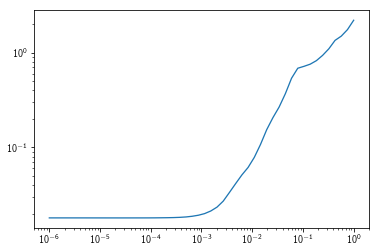

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.94705170255181e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
337 / 30000 iterations
applying cutoff
... took 77.9751450609183 seconds
(g,i)=(200,1) ...
find hyperparameter
current_scores [0.01870219 0.01870239 0.01870268 0.0187031  0.01870364 0.01870427
 0.01870481 0.01870521 0.01870591 0.01870557 0.01870648 0.01870805
 0.01870552 0.0187061  0.01871209 0.0187151  0.01871823 0.01872737
 0.01874435 0.01877448 0.01882797 0.0189227  0.01909014 0.01938568
 0.01987328 0.02063595 0.02195899 0.02406284 0.02769604 0.0337742
 0.04140358 0.05107071 0.06127089 0.07821776 0.10752936 0.15492214
 0.20850917 0.26990519 0.37177826 0.53938566 0.68732669 0.71889114
 0.757626   0.82569344 0.93889362 1.

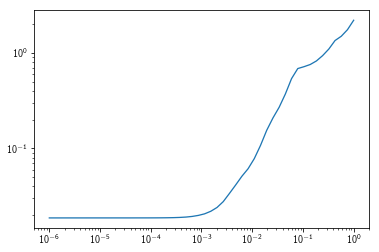

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
330 / 30000 iterations
applying cutoff
... took 76.38587063702289 seconds
(g,i)=(200,2) ...
find hyperparameter
current_scores [0.01867384 0.01867353 0.01867309 0.01867252 0.0186717  0.01867059
 0.01866909 0.01866724 0.01866581 0.01866532 0.01866566 0.01866716
 0.01866974 0.01867288 0.01867803 0.01868425 0.01869048 0.01870689
 0.01873897 0.01879716 0.0188697  0.01897924 0.01915082 0.0194424
 0.01987687 0.02062757 0.02195705 0.02410845 0.02772156 0.03369383
 0.04173936 0.05155903 0.06202587 0.07886376 0.1074644  0.15411915
 0.20687517 0.26811126 0.37002747 0.53662118 0.69001779 0.72169426
 0.76039003 0.82828579 0.94148769 1.10365213 1.354

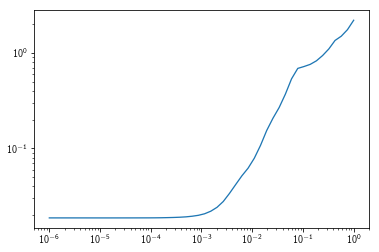

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.2648552168552958e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
327 / 30000 iterations
applying cutoff
... took 72.85123299097177 seconds
(g,i)=(200,3) ...
find hyperparameter
current_scores [0.01822939 0.01822959 0.01822945 0.0182288  0.01822738 0.01822491
 0.0182235  0.01822297 0.01822273 0.01822256 0.01822334 0.01822606
 0.01823089 0.0182371  0.0182407  0.01824752 0.01825809 0.018275
 0.01830869 0.01834025 0.01839456 0.01849114 0.01866118 0.01896138
 0.0194118  0.02017847 0.02152289 0.02364602 0.0272836  0.03362511
 0.04143581 0.05133315 0.06225995 0.07924643 0.10849683 0.1547006
 0.20749505 0.26958988 0.37144735 0.54051204 0.69257706 0.72392626
 0.76237168 0.82993284 0.9421648  1

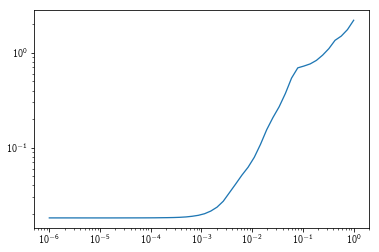

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.2648552168552958e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
346 / 30000 iterations
applying cutoff
... took 78.46520927303936 seconds
(g,i)=(200,4) ...
find hyperparameter
current_scores [0.01820373 0.01820377 0.01820383 0.01820412 0.01820481 0.01820614
 0.01820763 0.01820702 0.01820502 0.0182036  0.01820232 0.01820194
 0.01820537 0.01821213 0.01822049 0.01822398 0.01822687 0.01824526
 0.01827095 0.01830795 0.01836309 0.01846199 0.01863036 0.01892023
 0.01937278 0.02015171 0.02151695 0.02382809 0.02749937 0.03365289
 0.04161285 0.05141568 0.06223534 0.07915002 0.10800701 0.15465254
 0.20792928 0.2697524  0.37170766 0.54004961 0.68853023 0.71987631
 0.75858808 0.82658105 0.9394737

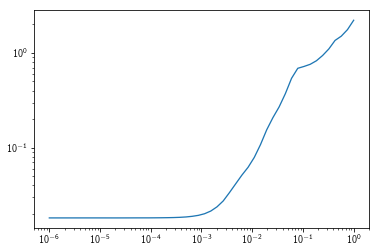

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.2229964825261955e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
329 / 30000 iterations
applying cutoff
... took 76.91531079402193 seconds
(g,i)=(200,5) ...
find hyperparameter
current_scores [0.01850666 0.01850633 0.01850593 0.01850548 0.01850489 0.0185043
 0.01850391 0.01850328 0.01850243 0.01850087 0.01849843 0.01849665
 0.01849698 0.01849971 0.01850331 0.01850975 0.01852077 0.01853521
 0.01856132 0.01861688 0.01871524 0.01884178 0.01900757 0.01930127
 0.01978906 0.02054839 0.02182484 0.0238746  0.02747057 0.03373838
 0.04156985 0.05108966 0.06137026 0.07829221 0.1074315  0.15472031
 0.20834448 0.26966279 0.37121183 0.53979052 0.69005699 0.72263398
 0.7612167  0.82880921 0.94133773

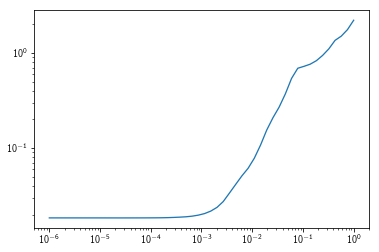

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.2229964825261955e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
337 / 30000 iterations
applying cutoff
... took 77.66691428190097 seconds
(g,i)=(200,6) ...
find hyperparameter
current_scores [0.01849434 0.01849401 0.01849359 0.0184934  0.01849318 0.01849398
 0.01849517 0.01849517 0.0184938  0.01849172 0.01849101 0.0184881
 0.01848789 0.01848999 0.01849346 0.01849611 0.01850301 0.01852021
 0.0185394  0.01856884 0.01862421 0.01872051 0.01889166 0.01919465
 0.01972746 0.02051938 0.02186133 0.02404716 0.02766065 0.03392256
 0.04173724 0.05109652 0.06179003 0.07872809 0.10791144 0.15488018
 0.2092096  0.27100061 0.37286372 0.54059381 0.68937512 0.72134906
 0.75994145 0.82735432 0.94005691

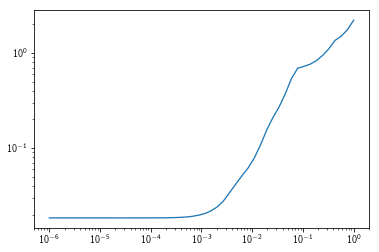

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.94705170255181e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
329 / 30000 iterations
applying cutoff
... took 75.31106285995338 seconds
(g,i)=(200,7) ...
find hyperparameter
current_scores [0.01815477 0.01815444 0.01815404 0.01815371 0.01815322 0.0181532
 0.01815304 0.01815214 0.01815102 0.01815122 0.01815293 0.01815678
 0.018158   0.01815848 0.01816221 0.01816808 0.01818066 0.01820313
 0.01823647 0.01827693 0.01833137 0.01842321 0.01858676 0.01885502
 0.0192872  0.02004675 0.02136266 0.02343531 0.02707399 0.03339369
 0.04139507 0.0512485  0.0612399  0.07816464 0.10761629 0.15567882
 0.20833217 0.26891329 0.37043706 0.53616983 0.68740256 0.71963478
 0.75835035 0.82619328 0.93952499 1

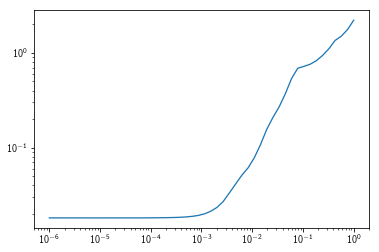

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.540954763499944e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
350 / 30000 iterations
applying cutoff
... took 80.54847190505825 seconds
(g,i)=(200,8) ...
find hyperparameter
current_scores [0.01841625 0.01841617 0.0184161  0.01841595 0.01841567 0.0184152
 0.01841435 0.01841296 0.01841181 0.01841087 0.01841008 0.01841034
 0.01841336 0.0184161  0.01841999 0.01842264 0.01842815 0.01843686
 0.01846432 0.01851842 0.01861549 0.01873903 0.01891288 0.01921367
 0.01973443 0.02050557 0.02177436 0.02385104 0.02750194 0.03384537
 0.04181331 0.05122626 0.06169177 0.07860454 0.10750406 0.15414541
 0.20705055 0.26808981 0.36951325 0.53617985 0.68809985 0.7194678
 0.75847798 0.82679158 0.94056435 1

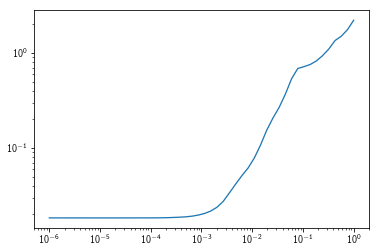

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.67683293681101e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
338 / 30000 iterations
applying cutoff
... took 78.49813109193929 seconds
(g,i)=(200,9) ...
find hyperparameter
current_scores [0.01866269 0.01866267 0.0186626  0.01866256 0.01866259 0.01866273
 0.01866322 0.01866396 0.01866444 0.01866312 0.01866043 0.0186604
 0.0186621  0.01866496 0.01866793 0.01867198 0.01868213 0.01870184
 0.01873173 0.0187692  0.01882554 0.01892776 0.01910126 0.01938103
 0.01981488 0.0205809  0.02186851 0.02393637 0.0275673  0.03377552
 0.041576   0.0517065  0.06226716 0.07939549 0.10863696 0.15493801
 0.20508731 0.26604612 0.36790703 0.53512182 0.68387501 0.71659672
 0.75537144 0.82330065 0.93633349 1

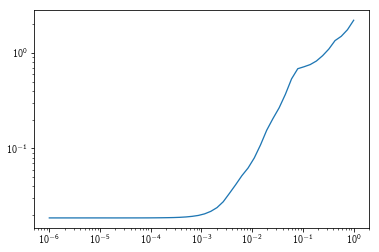

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.2229964825261955e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
333 / 30000 iterations
applying cutoff
... took 77.68614883092232 seconds
(g,i)=(500,0) ...
find hyperparameter
current_scores [0.0075592  0.00755884 0.00755851 0.00755809 0.00755725 0.00755619
 0.00755524 0.00755444 0.00755414 0.00755439 0.00755333 0.00755344
 0.00755565 0.00755748 0.00755859 0.00756215 0.00756962 0.00758501
 0.00761241 0.00765782 0.00771109 0.00780321 0.00797133 0.00827208
 0.00873046 0.00948877 0.01078758 0.01283788 0.0164404  0.02270466
 0.0311291  0.04096619 0.05171669 0.06865926 0.09791459 0.14540538
 0.1983359  0.25949886 0.36143705 0.52918185 0.67645112 0.70851612
 0.74707183 0.81477204 0.9275682

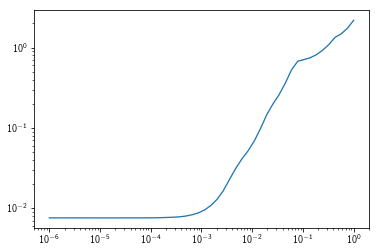

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.67683293681101e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
351 / 30000 iterations
applying cutoff
... took 79.22118559491355 seconds
(g,i)=(500,1) ...
find hyperparameter
current_scores [0.00753392 0.0075338  0.00753366 0.00753351 0.00753338 0.00753339
 0.00753349 0.00753355 0.00753367 0.00753362 0.00753349 0.00753547
 0.00753646 0.00753791 0.00754163 0.00754654 0.00755669 0.007576
 0.00760882 0.00764627 0.00769867 0.00779049 0.00795929 0.00825412
 0.00871669 0.00947403 0.01080605 0.01299597 0.01658819 0.02264136
 0.0307734  0.04043476 0.05111787 0.0680631  0.09726696 0.14445482
 0.19742341 0.25933969 0.36241214 0.53154637 0.67481357 0.70643413
 0.74516434 0.81314476 0.92559559 1.

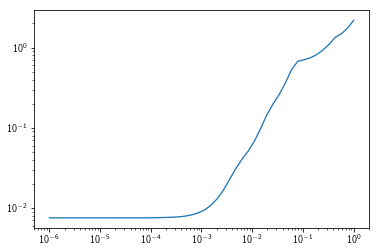

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.0888435964774785e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
344 / 30000 iterations
applying cutoff
... took 79.9047602530336 seconds
(g,i)=(500,2) ...
find hyperparameter
current_scores [0.00744719 0.00744707 0.00744691 0.0074467  0.00744651 0.00744637
 0.00744587 0.00744535 0.00744491 0.00744429 0.00744432 0.00744526
 0.00744664 0.00744724 0.00744844 0.007453   0.00746091 0.00747736
 0.00750813 0.00755202 0.00760533 0.00769924 0.00786464 0.00815613
 0.00859285 0.0093376  0.0106469  0.01278683 0.0163337  0.02244106
 0.02967657 0.03953521 0.04976735 0.06664034 0.0958266  0.14308006
 0.19539861 0.25640102 0.35824726 0.52489515 0.67475391 0.70703542
 0.74527285 0.81222472 0.92373163

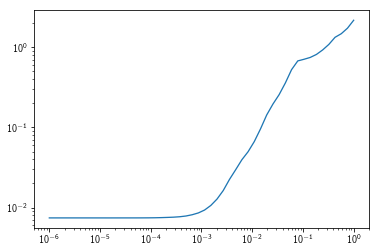

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.2648552168552958e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
352 / 30000 iterations
applying cutoff
... took 84.97296048409771 seconds
(g,i)=(500,3) ...
find hyperparameter
current_scores [0.00766519 0.00766518 0.00766516 0.00766513 0.00766506 0.00766502
 0.00766512 0.0076653  0.00766557 0.00766555 0.00766533 0.00766617
 0.00766876 0.00767052 0.00767148 0.00767515 0.00768385 0.00770203
 0.00773189 0.00776283 0.00781611 0.00790963 0.00807464 0.00836662
 0.00882215 0.00957143 0.01089215 0.01302988 0.01660521 0.02261703
 0.03026242 0.03993756 0.05042043 0.06729981 0.09624551 0.14314165
 0.1944092  0.25515563 0.35685362 0.52424822 0.67167314 0.70365775
 0.74217165 0.80962903 0.9222450

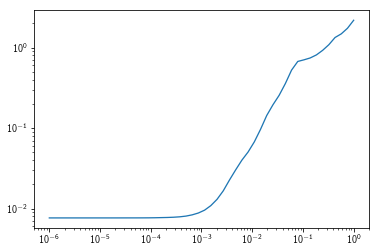

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=4.094915062380427e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
355 / 30000 iterations
applying cutoff
... took 81.12307920097373 seconds
(g,i)=(500,4) ...
find hyperparameter
current_scores [0.00762079 0.00762075 0.00762067 0.00762053 0.0076203  0.00762009
 0.00761984 0.00761973 0.00761998 0.00762069 0.0076218  0.0076222
 0.00762372 0.00762762 0.00763221 0.00763789 0.00764962 0.00767201
 0.00771003 0.007762   0.0078174  0.00791494 0.00808785 0.00838961
 0.00885498 0.00963524 0.01101847 0.01324436 0.01696668 0.0230251
 0.03107752 0.04055356 0.05101289 0.06809469 0.09734626 0.14408509
 0.19667305 0.2584721  0.36125362 0.5288696  0.67541931 0.70708254
 0.7464071  0.81506814 0.92934902 1

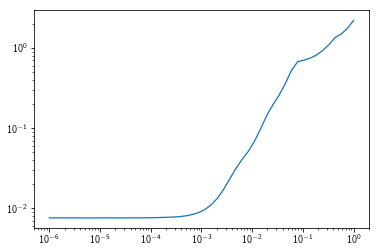

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=7.196856730011514e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
345 / 30000 iterations
applying cutoff
... took 77.45189201703761 seconds
(g,i)=(500,5) ...
find hyperparameter
current_scores [0.00740527 0.00740526 0.00740529 0.00740546 0.00740556 0.00740528
 0.00740498 0.00740543 0.00740622 0.00740641 0.00740612 0.00740534
 0.00740517 0.00740714 0.00741149 0.00741819 0.00743014 0.00745062
 0.00748414 0.00754356 0.00761867 0.00771704 0.00789034 0.0081935
 0.00863035 0.00940281 0.01076153 0.01296966 0.01663795 0.02285396
 0.03074965 0.04054143 0.05106424 0.068144   0.09779501 0.14473538
 0.19693457 0.25765747 0.35970584 0.52697279 0.67549269 0.70816478
 0.74763032 0.81672921 0.93205802 

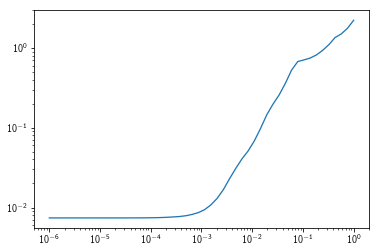

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.428675439323859e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
342 / 30000 iterations
applying cutoff
... took 74.99779484595638 seconds
(g,i)=(500,6) ...
find hyperparameter
current_scores [0.00788378 0.00788368 0.00788351 0.00788327 0.00788294 0.00788241
 0.0078817  0.00788103 0.00788031 0.00787957 0.00787959 0.00787904
 0.00787978 0.00788167 0.0078854  0.00789056 0.00789885 0.00791602
 0.00794742 0.00800231 0.0080595  0.0081566  0.00832917 0.008634
 0.0091107  0.00988943 0.01125419 0.01338648 0.0170704  0.02331788
 0.03116222 0.04077612 0.05151488 0.06850496 0.09775907 0.14440271
 0.19685575 0.25797793 0.36029127 0.52873153 0.67942249 0.71171145
 0.75091353 0.81970782 0.93443428 1

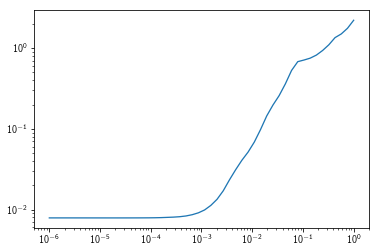

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.2229964825261955e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
336 / 30000 iterations
applying cutoff
... took 75.62728377303574 seconds
(g,i)=(500,7) ...
find hyperparameter
current_scores [0.00772353 0.00772357 0.00772363 0.00772377 0.00772392 0.00772392
 0.00772365 0.00772359 0.00772363 0.0077237  0.00772334 0.00772163
 0.00772233 0.0077236  0.00772799 0.00773491 0.00774788 0.00776988
 0.007803   0.00785245 0.00790874 0.00800677 0.00817626 0.00847284
 0.00897815 0.00975344 0.01111488 0.01323832 0.01692339 0.02320522
 0.03110657 0.04063237 0.05103288 0.06804763 0.09729379 0.14416996
 0.1956085  0.25653988 0.35819869 0.52544498 0.67515962 0.70752337
 0.74691285 0.81605526 0.9313412

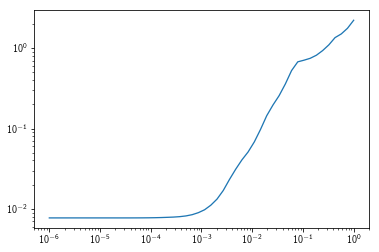

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.2229964825261955e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
342 / 30000 iterations
applying cutoff
... took 79.36990123300347 seconds
(g,i)=(500,8) ...
find hyperparameter
current_scores [0.00753562 0.00753527 0.00753484 0.00753435 0.00753386 0.00753333
 0.00753269 0.00753212 0.00753196 0.00753214 0.00753261 0.00753394
 0.0075354  0.0075353  0.00753708 0.00754128 0.00755058 0.00757056
 0.00760421 0.00763739 0.00769199 0.00778784 0.00795713 0.00825538
 0.00871036 0.00947083 0.01080877 0.01291903 0.01654183 0.02263157
 0.03067464 0.04073485 0.0511054  0.06810244 0.09743007 0.14511159
 0.19934232 0.26127783 0.36420028 0.53243212 0.67650957 0.70887898
 0.74763955 0.81554411 0.9282956

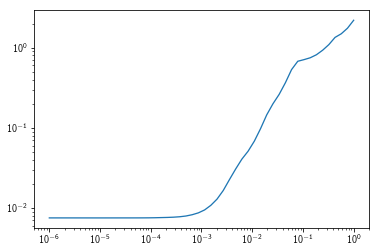

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.540954763499944e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
348 / 30000 iterations
applying cutoff
... took 76.07994763401803 seconds
(g,i)=(500,9) ...
find hyperparameter
current_scores [0.00761809 0.00761823 0.00761848 0.00761873 0.00761861 0.00761838
 0.00761813 0.00761794 0.00761785 0.00761868 0.00762113 0.00762425
 0.00762685 0.0076266  0.00763014 0.00763918 0.00765229 0.00766966
 0.00770183 0.00774762 0.00780336 0.00789902 0.00806572 0.00836075
 0.00884579 0.00960732 0.01094524 0.01305928 0.01669572 0.02286685
 0.03082363 0.04065808 0.05123955 0.06814811 0.09730559 0.14452587
 0.19835153 0.25975986 0.36196747 0.53005515 0.67755852 0.70983123
 0.74877991 0.81693871 0.93033053

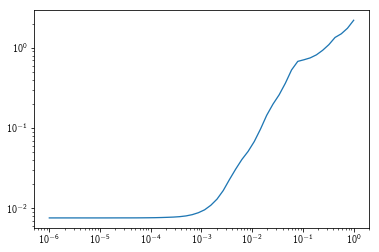

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.540954763499944e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
355 / 30000 iterations
applying cutoff
... took 78.5372773220297 seconds
(g,i)=(1000,0) ...
find hyperparameter
current_scores [0.00395939 0.00395917 0.00395879 0.00395828 0.00395774 0.00395712
 0.00395651 0.0039559  0.00395553 0.00395513 0.0039548  0.00395475
 0.00395592 0.0039584  0.0039622  0.00396795 0.00397875 0.00399798
 0.00403132 0.00408986 0.00415471 0.00425287 0.00442511 0.00472747
 0.00520985 0.00598647 0.0073392  0.00944183 0.01311222 0.0193987
 0.02733269 0.03719871 0.04780874 0.0648984  0.09422782 0.14125653
 0.19414553 0.25581808 0.3581277  0.5260923  0.67222044 0.70462666
 0.74360697 0.812026   0.92563331 

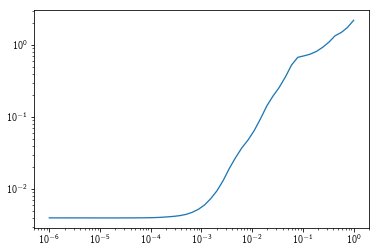

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.2229964825261955e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
340 / 30000 iterations
applying cutoff
... took 74.3502574529266 seconds
(g,i)=(1000,1) ...
find hyperparameter
current_scores [0.00373703 0.00373701 0.00373681 0.0037366  0.00373642 0.00373618
 0.00373595 0.00373606 0.0037361  0.00373618 0.00373639 0.00373684
 0.0037379  0.00374015 0.00374359 0.00374894 0.00376005 0.00378097
 0.00381332 0.00386593 0.00392153 0.00401355 0.00418278 0.00447185
 0.00490506 0.0056709  0.00701539 0.00918833 0.01281044 0.01884555
 0.02708408 0.03668469 0.04751788 0.06448107 0.09360757 0.14090235
 0.1932001  0.25465205 0.35750644 0.5264644  0.67128976 0.70310592
 0.74176395 0.80950227 0.9222991

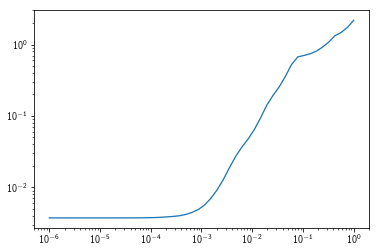

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.428675439323859e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
342 / 30000 iterations
applying cutoff
... took 76.20079704897944 seconds
(g,i)=(1000,2) ...
find hyperparameter
current_scores [0.00380066 0.00380016 0.00379965 0.00379937 0.00379909 0.0037988
 0.0037986  0.00379844 0.00379813 0.00379759 0.00379812 0.00379964
 0.00380026 0.00380192 0.00380483 0.00380929 0.00381963 0.0038385
 0.00387129 0.00391867 0.00397295 0.00406788 0.00423484 0.00452898
 0.00499568 0.00575214 0.00708233 0.00920726 0.01281163 0.01900205
 0.02689562 0.03653456 0.04697602 0.06390597 0.09302659 0.14022298
 0.19305022 0.25394873 0.35578968 0.52391521 0.67165067 0.70408222
 0.74254795 0.80983654 0.92231239 

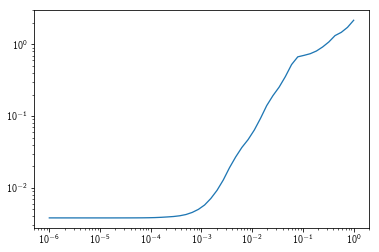

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.2648552168552958e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
350 / 30000 iterations
applying cutoff
... took 81.7290232978994 seconds
(g,i)=(1000,3) ...
find hyperparameter
current_scores [0.00379455 0.00379449 0.00379441 0.00379432 0.00379414 0.00379381
 0.00379345 0.00379321 0.00379327 0.00379364 0.0037944  0.0037952
 0.00379769 0.00379977 0.00380227 0.00380663 0.00381529 0.00383195
 0.00386358 0.00392199 0.0039843  0.00408096 0.00424911 0.00454673
 0.00503293 0.00579706 0.00712897 0.00919379 0.01281455 0.01896095
 0.02706395 0.03707556 0.04797035 0.06494159 0.09429156 0.14121314
 0.19438284 0.25560097 0.3576888  0.52553198 0.67291047 0.70486508
 0.74392712 0.81248606 0.92666887

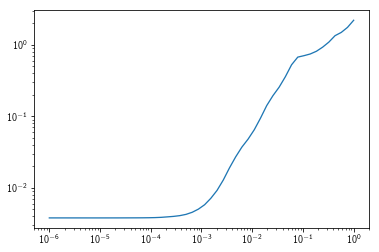

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=7.196856730011514e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
354 / 30000 iterations
applying cutoff
... took 77.52393776597455 seconds
(g,i)=(1000,4) ...
find hyperparameter
current_scores [0.0038482  0.00384819 0.00384822 0.00384831 0.00384839 0.0038484
 0.00384825 0.00384791 0.00384723 0.00384666 0.00384663 0.00384782
 0.00384984 0.00385353 0.00385804 0.00386305 0.00387313 0.00389186
 0.00392484 0.00397641 0.00403159 0.00412925 0.00430103 0.00459081
 0.00502111 0.00577679 0.00710388 0.00919445 0.01279094 0.01895012
 0.02676759 0.03665535 0.0471213  0.06401381 0.09306201 0.13985101
 0.19301323 0.25382174 0.35521176 0.52136305 0.66971406 0.70141893
 0.73996932 0.80755832 0.92024988

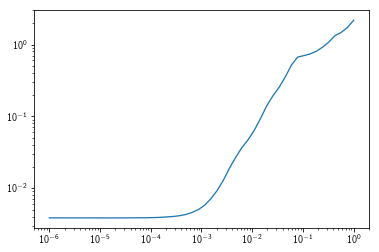

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.67683293681101e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
344 / 30000 iterations
applying cutoff
... took 77.53615203499794 seconds
(g,i)=(1000,5) ...
find hyperparameter
current_scores [0.00379434 0.0037943  0.00379434 0.00379416 0.00379388 0.00379383
 0.00379406 0.00379461 0.00379479 0.003795   0.00379594 0.003797
 0.00379841 0.00380134 0.00380405 0.0038093  0.00381907 0.00383667
 0.0038686  0.00392141 0.00397894 0.00407911 0.00425439 0.0045621
 0.00503233 0.00582002 0.00719467 0.00933595 0.01306113 0.01939451
 0.02767566 0.03751377 0.04824888 0.06536401 0.09496689 0.14216828
 0.1950772  0.25663568 0.35914983 0.52736385 0.67244828 0.70488035
 0.74415811 0.81296929 0.92750603 1.

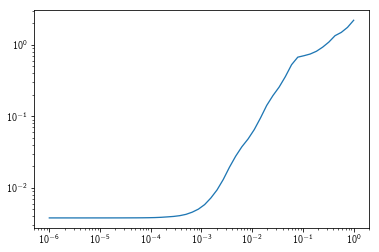

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=4.094915062380427e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
349 / 30000 iterations
applying cutoff
... took 76.19058940303512 seconds
(g,i)=(1000,6) ...
find hyperparameter
current_scores [0.0037658  0.00376566 0.00376563 0.00376562 0.00376562 0.00376562
 0.0037653  0.00376517 0.00376523 0.00376507 0.00376463 0.00376422
 0.00376451 0.00376536 0.00376797 0.0037743  0.00378626 0.00380561
 0.00383856 0.00389635 0.00396557 0.00406103 0.00422969 0.00452569
 0.00501964 0.00578419 0.00711116 0.00918152 0.01280785 0.01889038
 0.02677245 0.03674532 0.04744438 0.06438451 0.09379455 0.14080547
 0.19446856 0.25557888 0.357021   0.52428948 0.67338656 0.70533474
 0.7442309  0.81256352 0.9265870

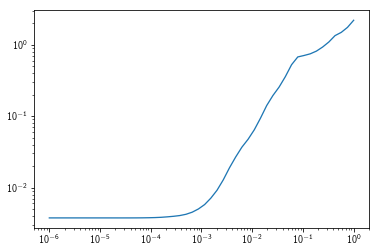

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.2229964825261955e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
341 / 30000 iterations
applying cutoff
... took 76.53167961002328 seconds
(g,i)=(1000,7) ...
find hyperparameter
current_scores [0.00379309 0.0037932  0.00379332 0.00379297 0.00379277 0.00379283
 0.00379307 0.00379357 0.00379416 0.00379492 0.00379573 0.00379656
 0.00379748 0.00380002 0.00380533 0.00381313 0.00382479 0.00384577
 0.003881   0.00392873 0.00398257 0.00407734 0.0042443  0.00453918
 0.00497456 0.00573544 0.0070728  0.00920438 0.01280565 0.01880244
 0.02674674 0.0368363  0.04757277 0.06446393 0.09353333 0.13985802
 0.19245111 0.25291215 0.35415682 0.52060848 0.67025712 0.70194079
 0.7406293  0.80835058 0.921554

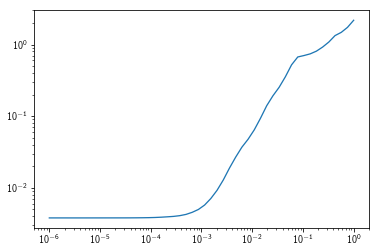

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.0888435964774785e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
350 / 30000 iterations
applying cutoff
... took 83.17723102902528 seconds
(g,i)=(1000,8) ...
find hyperparameter
current_scores [0.00384647 0.00384641 0.00384627 0.00384601 0.00384571 0.00384572
 0.00384603 0.0038462  0.00384688 0.00384848 0.00385164 0.00385281
 0.00385322 0.00385461 0.00385817 0.00386569 0.00387899 0.00389803
 0.00392984 0.00398461 0.00403927 0.00413369 0.0043004  0.00459718
 0.00504124 0.00579854 0.00712931 0.00920336 0.01280121 0.01888048
 0.02691778 0.03660455 0.04711305 0.06401999 0.09309228 0.13974293
 0.19305288 0.25388    0.35525252 0.52229773 0.67097451 0.70300104
 0.74161349 0.80934611 0.922461

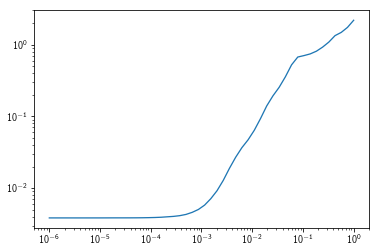

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.0888435964774785e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
351 / 30000 iterations
applying cutoff
... took 76.70873663201928 seconds
(g,i)=(1000,9) ...
find hyperparameter
current_scores [0.00368285 0.00368271 0.00368243 0.00368235 0.00368234 0.00368234
 0.00368253 0.00368268 0.00368261 0.00368264 0.00368308 0.00368343
 0.00368489 0.00368764 0.00369205 0.00369886 0.00370816 0.00372781
 0.00376257 0.00382361 0.00389034 0.00398263 0.0041483  0.00444577
 0.00488883 0.00564786 0.00697489 0.009046   0.01266129 0.0187888
 0.02691793 0.03692611 0.04769601 0.06465343 0.09401735 0.14091601
 0.19309821 0.25383343 0.35535027 0.52266689 0.66932814 0.70166035
 0.74023766 0.80782701 0.9205977

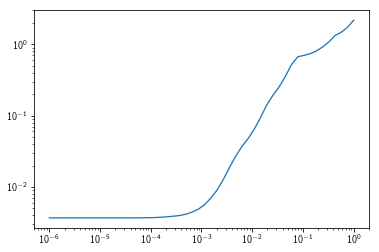

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=4.094915062380427e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
353 / 30000 iterations
applying cutoff
... took 79.52450941503048 seconds
(g,i)=(2000,0) ...
find hyperparameter
current_scores [2.01207199e-03 2.01204240e-03 2.01175390e-03 2.01155779e-03
 2.01152659e-03 2.01157695e-03 2.01139374e-03 2.01067428e-03
 2.01017074e-03 2.01003567e-03 2.00980133e-03 2.01021207e-03
 2.01144585e-03 2.01408919e-03 2.01791104e-03 2.02410979e-03
 2.03508786e-03 2.05248312e-03 2.08354568e-03 2.13553169e-03
 2.18963320e-03 2.28487073e-03 2.45241875e-03 2.74710767e-03
 3.20957290e-03 3.96716849e-03 5.29895558e-03 7.38852727e-03
 1.09875244e-02 1.71051493e-02 2.50539483e-02 3.48118501e-02
 4.53429764e-

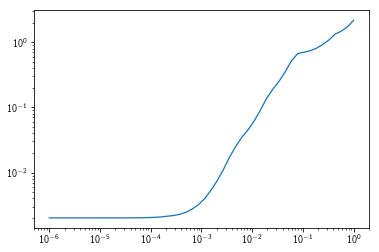

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.67683293681101e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
344 / 30000 iterations
applying cutoff
... took 75.36883200507145 seconds
(g,i)=(2000,1) ...
find hyperparameter
current_scores [1.91611524e-03 1.91612925e-03 1.91610262e-03 1.91600494e-03
 1.91605058e-03 1.91596297e-03 1.91556889e-03 1.91507465e-03
 1.91471519e-03 1.91464815e-03 1.91467297e-03 1.91422802e-03
 1.91421682e-03 1.91541154e-03 1.91882781e-03 1.92489971e-03
 1.93577848e-03 1.95506901e-03 1.98859299e-03 2.04602784e-03
 2.10319092e-03 2.19943528e-03 2.36857856e-03 2.66565305e-03
 3.11639964e-03 3.87860913e-03 5.21746204e-03 7.34703887e-03
 1.09651979e-02 1.71407716e-02 2.51315898e-02 3.51399829e-02
 4.59191964e-0

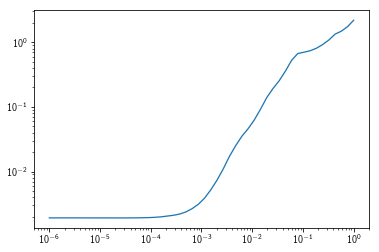

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.94705170255181e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
334 / 30000 iterations
applying cutoff
... took 73.12701633502729 seconds
(g,i)=(2000,2) ...
find hyperparameter
current_scores [1.99057268e-03 1.99055905e-03 1.99058494e-03 1.99074261e-03
 1.99100671e-03 1.99149849e-03 1.99213194e-03 1.99214202e-03
 1.99223051e-03 1.99210360e-03 1.99225117e-03 1.99327592e-03
 1.99463219e-03 1.99737626e-03 2.00170926e-03 2.00859345e-03
 2.01842057e-03 2.03658119e-03 2.06853579e-03 2.12310997e-03
 2.17733636e-03 2.27101003e-03 2.43715154e-03 2.72943747e-03
 3.19701607e-03 3.94689138e-03 5.26524347e-03 7.32669768e-03
 1.09040166e-02 1.70057352e-02 2.48265490e-02 3.49192729e-02
 4.56638235e-0

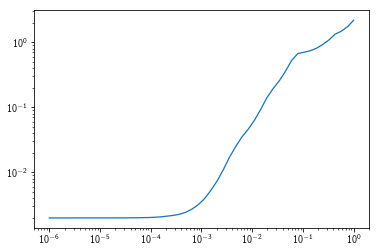

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.325711365590108e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
355 / 30000 iterations
applying cutoff
... took 83.88751177699305 seconds
(g,i)=(2000,3) ...
find hyperparameter
current_scores [1.94490878e-03 1.94486496e-03 1.94482769e-03 1.94494474e-03
 1.94528555e-03 1.94558335e-03 1.94555885e-03 1.94588408e-03
 1.94648282e-03 1.94750601e-03 1.94878087e-03 1.94941855e-03
 1.95078689e-03 1.95420768e-03 1.95903540e-03 1.96465005e-03
 1.97557531e-03 1.99571068e-03 2.03130482e-03 2.07279659e-03
 2.13053682e-03 2.23224043e-03 2.41006018e-03 2.72112302e-03
 3.21216959e-03 4.00673780e-03 5.39613740e-03 7.59452762e-03
 1.13438508e-02 1.75776317e-02 2.57241965e-02 3.55559821e-02
 4.63654995e-

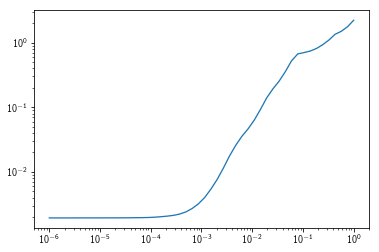

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.757510624854793e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
358 / 30000 iterations
applying cutoff
... took 78.42810328199994 seconds
(g,i)=(2000,4) ...
find hyperparameter
current_scores [1.89455895e-03 1.89446445e-03 1.89435401e-03 1.89423038e-03
 1.89400011e-03 1.89377813e-03 1.89362318e-03 1.89361206e-03
 1.89360274e-03 1.89384505e-03 1.89461768e-03 1.89577203e-03
 1.89686408e-03 1.89895550e-03 1.90303483e-03 1.90865093e-03
 1.91776232e-03 1.93534263e-03 1.96805250e-03 2.01980049e-03
 2.07415385e-03 2.16975080e-03 2.33788639e-03 2.63363114e-03
 3.11436545e-03 3.87424087e-03 5.20875375e-03 7.28289786e-03
 1.08969381e-02 1.71142710e-02 2.52247279e-02 3.51857986e-02
 4.58409735e-

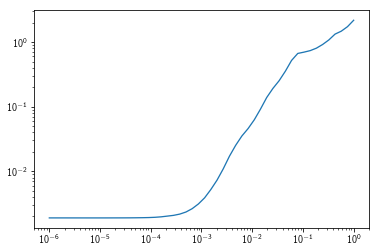

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.540954763499944e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
348 / 30000 iterations
applying cutoff
... took 85.64504768396728 seconds
(g,i)=(2000,5) ...
find hyperparameter
current_scores [1.89090380e-03 1.89075742e-03 1.89062702e-03 1.89039291e-03
 1.89021657e-03 1.89017510e-03 1.89017483e-03 1.89052002e-03
 1.89102935e-03 1.89137418e-03 1.89133669e-03 1.89161409e-03
 1.89314026e-03 1.89586349e-03 1.90044327e-03 1.90777211e-03
 1.91608063e-03 1.93306124e-03 1.96581944e-03 2.02356665e-03
 2.08332807e-03 2.17846742e-03 2.34540259e-03 2.63858332e-03
 3.10134210e-03 3.85185573e-03 5.17046375e-03 7.21824790e-03
 1.07915992e-02 1.68756759e-02 2.49492450e-02 3.47945343e-02
 4.54469876e-

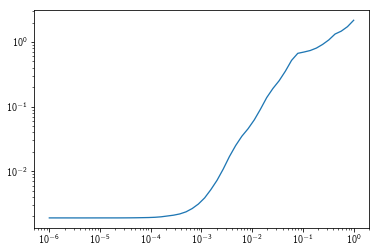

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.428675439323859e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
352 / 30000 iterations
applying cutoff
... took 79.34237127401866 seconds
(g,i)=(2000,6) ...
find hyperparameter
current_scores [1.84844050e-03 1.84834736e-03 1.84822762e-03 1.84803512e-03
 1.84769389e-03 1.84742033e-03 1.84728532e-03 1.84702182e-03
 1.84676856e-03 1.84667244e-03 1.84692987e-03 1.84768217e-03
 1.84913661e-03 1.85101656e-03 1.85430817e-03 1.86050841e-03
 1.87142177e-03 1.89033199e-03 1.92343633e-03 1.97476279e-03
 2.02973101e-03 2.12514625e-03 2.29259533e-03 2.58771174e-03
 3.05394665e-03 3.81089288e-03 5.13830583e-03 7.22115162e-03
 1.08176034e-02 1.68685932e-02 2.47651185e-02 3.47174733e-02
 4.55032652e-

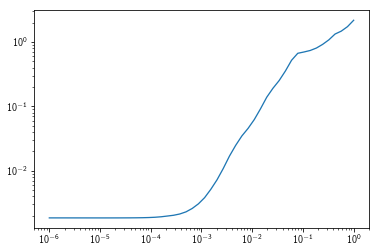

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.2648552168552958e-05, lambda=1.0)!
status 0: Optimization terminated successfully.
348 / 30000 iterations
applying cutoff
... took 77.08811059594154 seconds
(g,i)=(2000,7) ...
find hyperparameter
current_scores [1.88693803e-03 1.88703128e-03 1.88710098e-03 1.88675472e-03
 1.88663823e-03 1.88663845e-03 1.88682145e-03 1.88735440e-03
 1.88823192e-03 1.88927610e-03 1.88998785e-03 1.89043117e-03
 1.89072233e-03 1.89210558e-03 1.89582470e-03 1.90295466e-03
 1.91391534e-03 1.93172535e-03 1.96346329e-03 2.01654580e-03
 2.07048232e-03 2.16503529e-03 2.33199252e-03 2.62675955e-03
 3.06239672e-03 3.81893231e-03 5.14852043e-03 7.32432132e-03
 1.09241798e-02 1.69291243e-02 2.49476929e-02 3.48052226e-02
 4.54766170e

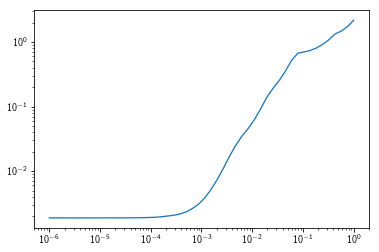

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.0888435964774785e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
352 / 30000 iterations
applying cutoff
... took 76.6358552390011 seconds
(g,i)=(2000,8) ...
find hyperparameter
current_scores [1.95013464e-03 1.95002524e-03 1.94989747e-03 1.94975816e-03
 1.94964423e-03 1.94950879e-03 1.94942031e-03 1.94938637e-03
 1.94934586e-03 1.94938856e-03 1.94960950e-03 1.94952035e-03
 1.95036598e-03 1.95229765e-03 1.95693948e-03 1.96500042e-03
 1.97582145e-03 1.99440844e-03 2.02499445e-03 2.06797334e-03
 2.12072381e-03 2.21561416e-03 2.38322569e-03 2.67803936e-03
 3.15438358e-03 3.90974138e-03 5.23709669e-03 7.37643452e-03
 1.09705745e-02 1.70207073e-02 2.50428616e-02 3.48895100e-02
 4.54789005e-

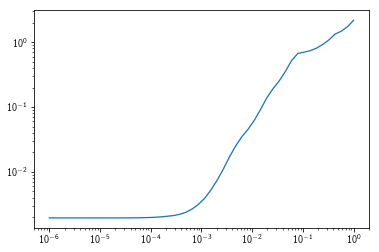

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=9.540954763499944e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
344 / 30000 iterations
applying cutoff
... took 77.36992347694468 seconds
(g,i)=(2000,9) ...
find hyperparameter
current_scores [1.93335926e-03 1.93321383e-03 1.93308131e-03 1.93284643e-03
 1.93248608e-03 1.93214607e-03 1.93195219e-03 1.93209941e-03
 1.93211420e-03 1.93198049e-03 1.93224188e-03 1.93288366e-03
 1.93396383e-03 1.93550554e-03 1.93859335e-03 1.94486380e-03
 1.95603029e-03 1.97503413e-03 2.00785165e-03 2.06170270e-03
 2.11655558e-03 2.21214173e-03 2.38121452e-03 2.67830168e-03
 3.13089942e-03 3.88941023e-03 5.22206091e-03 7.30312317e-03
 1.09122760e-02 1.71051120e-02 2.50360191e-02 3.50396004e-02
 4.56176604e-

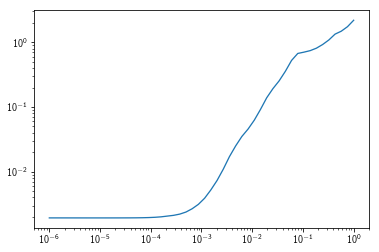

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.428675439323859e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
348 / 30000 iterations
applying cutoff
... took 78.5464138899697 seconds
(g,i)=(5000,0) ...
find hyperparameter
current_scores [7.39072619e-04 7.39031941e-04 7.38938628e-04 7.38839591e-04
 7.38800013e-04 7.38710107e-04 7.38584258e-04 7.38665354e-04
 7.39062345e-04 7.39677474e-04 7.40302891e-04 7.41299177e-04
 7.42696687e-04 7.44631222e-04 7.47857072e-04 7.53835615e-04
 7.64569116e-04 7.83336902e-04 8.16238013e-04 8.69665884e-04
 9.24410158e-04 1.02021905e-03 1.18864634e-03 1.48457375e-03
 1.95101815e-03 2.70887814e-03 4.04090680e-03 6.16959305e-03
 9.77507136e-03 1.59093765e-02 2.38388410e-02 3.36801348e-02
 4.42877439e-0

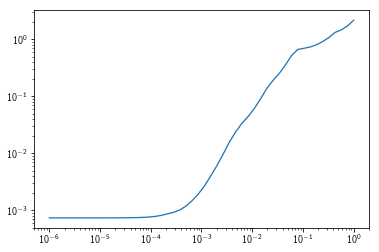

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.428675439323859e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
355 / 30000 iterations
applying cutoff
... took 83.66678422596306 seconds
(g,i)=(5000,1) ...
find hyperparameter
current_scores [7.65296368e-04 7.65263493e-04 7.65237590e-04 7.65213074e-04
 7.65242193e-04 7.65415479e-04 7.65563303e-04 7.65798373e-04
 7.65909530e-04 7.66034227e-04 7.66938707e-04 7.68594618e-04
 7.69935189e-04 7.72621479e-04 7.76806395e-04 7.83144945e-04
 7.93755693e-04 8.12319296e-04 8.45169193e-04 8.88795174e-04
 9.43817488e-04 1.04090957e-03 1.21153067e-03 1.51148166e-03
 1.97155087e-03 2.73997177e-03 4.09069371e-03 6.21249707e-03
 9.86622951e-03 1.60077399e-02 2.40003471e-02 3.38410178e-02
 4.45646338e-

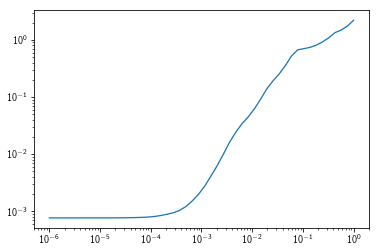

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.3299518105153717e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
352 / 30000 iterations
applying cutoff
... took 77.10224244405981 seconds
(g,i)=(5000,2) ...
find hyperparameter
current_scores [7.68765981e-04 7.68737005e-04 7.68711370e-04 7.68688195e-04
 7.68618187e-04 7.68510099e-04 7.68378958e-04 7.68354083e-04
 7.68435960e-04 7.68663274e-04 7.68917408e-04 7.69218427e-04
 7.70237053e-04 7.72248125e-04 7.75877790e-04 7.81885030e-04
 7.92381628e-04 8.10980408e-04 8.43457841e-04 8.87898115e-04
 9.41450822e-04 1.03610054e-03 1.20286544e-03 1.49589684e-03
 1.97011952e-03 2.72313008e-03 4.04640359e-03 6.16916674e-03
 9.75561944e-03 1.58529466e-02 2.37631598e-02 3.37397528e-02
 4.43819052e

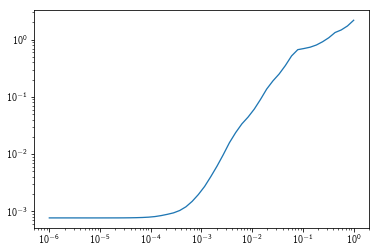

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=7.196856730011514e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
349 / 30000 iterations
applying cutoff
... took 78.35933771100827 seconds
(g,i)=(5000,3) ...
find hyperparameter
current_scores [7.84165733e-04 7.84155033e-04 7.84141344e-04 7.84099026e-04
 7.84028197e-04 7.83921181e-04 7.83892039e-04 7.83929443e-04
 7.83991116e-04 7.84080844e-04 7.84198911e-04 7.84543767e-04
 7.85258264e-04 7.86658231e-04 7.89846994e-04 7.96033082e-04
 8.06676870e-04 8.25357378e-04 8.58432519e-04 9.00789156e-04
 9.55941937e-04 1.05279290e-03 1.22290261e-03 1.52173054e-03
 1.98489430e-03 2.74933072e-03 4.09244374e-03 6.22271457e-03
 9.85295391e-03 1.59557804e-02 2.39407196e-02 3.39642451e-02
 4.46321481e-

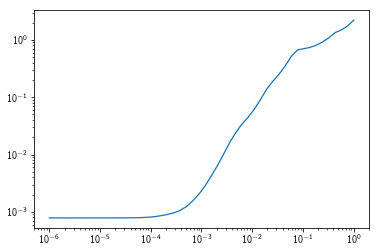

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.428675439323859e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
349 / 30000 iterations
applying cutoff
... took 75.98091556702275 seconds
(g,i)=(5000,4) ...
find hyperparameter
current_scores [7.91346251e-04 7.91281993e-04 7.91179270e-04 7.91060548e-04
 7.90934015e-04 7.90766155e-04 7.90607607e-04 7.90590160e-04
 7.90608961e-04 7.90754275e-04 7.91244354e-04 7.91982117e-04
 7.93060334e-04 7.95190406e-04 7.98909563e-04 8.05169728e-04
 8.15879017e-04 8.34417574e-04 8.67158172e-04 9.19672425e-04
 9.74507433e-04 1.07091520e-03 1.24050089e-03 1.53874579e-03
 2.00009359e-03 2.76601141e-03 4.11268840e-03 6.26081641e-03
 9.90789089e-03 1.60555564e-02 2.39774683e-02 3.37919631e-02
 4.42924622e-

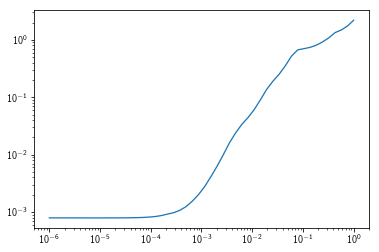

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=7.196856730011514e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
352 / 30000 iterations
applying cutoff
... took 78.84763587301131 seconds
(g,i)=(5000,5) ...
find hyperparameter
current_scores [8.03704339e-04 8.03673348e-04 8.03651669e-04 8.03650483e-04
 8.03742535e-04 8.03982735e-04 8.03990633e-04 8.04111457e-04
 8.04410412e-04 8.04805248e-04 8.05051994e-04 8.05438231e-04
 8.05955019e-04 8.07469575e-04 8.10771477e-04 8.16752363e-04
 8.27299752e-04 8.46046375e-04 8.78727072e-04 9.29986522e-04
 9.84338856e-04 1.08000177e-03 1.24819508e-03 1.54388240e-03
 2.01808106e-03 2.77996522e-03 4.11932888e-03 6.25047341e-03
 9.87092681e-03 1.59293376e-02 2.38872178e-02 3.38173373e-02
 4.44349444e-

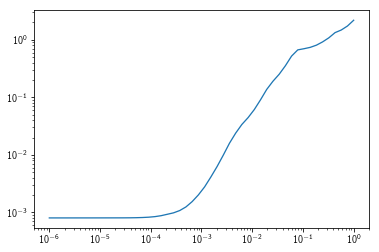

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.3299518105153717e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
355 / 30000 iterations
applying cutoff
... took 77.13788786099758 seconds
(g,i)=(5000,6) ...
find hyperparameter
current_scores [7.86131794e-04 7.86117862e-04 7.86124676e-04 7.86132769e-04
 7.86166704e-04 7.86191374e-04 7.86200203e-04 7.86216919e-04
 7.86311961e-04 7.86516049e-04 7.86904644e-04 7.87431829e-04
 7.88594474e-04 7.90384458e-04 7.93328984e-04 7.99166497e-04
 8.09807881e-04 8.28619931e-04 8.61646274e-04 9.11537886e-04
 9.66293130e-04 1.06151655e-03 1.22902659e-03 1.52353183e-03
 1.96805571e-03 2.72410565e-03 4.05297762e-03 6.14447751e-03
 9.74498190e-03 1.58736491e-02 2.38193929e-02 3.36103533e-02
 4.41934031e

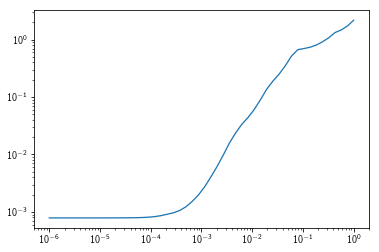

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.325711365590108e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
355 / 30000 iterations
applying cutoff
... took 83.33089828002267 seconds
(g,i)=(5000,7) ...
find hyperparameter
current_scores [8.10417828e-04 8.10455881e-04 8.10497987e-04 8.10521152e-04
 8.10449117e-04 8.10436031e-04 8.10391145e-04 8.10373384e-04
 8.10526864e-04 8.10811502e-04 8.11405602e-04 8.12421639e-04
 8.13747617e-04 8.15138294e-04 8.17858602e-04 8.23636621e-04
 8.34248115e-04 8.52800175e-04 8.85878792e-04 9.35436616e-04
 9.89805108e-04 1.08588923e-03 1.25434623e-03 1.55044063e-03
 2.00238805e-03 2.75779731e-03 4.08436329e-03 6.18027966e-03
 9.76609912e-03 1.58376238e-02 2.38368116e-02 3.36920821e-02
 4.43255016e-

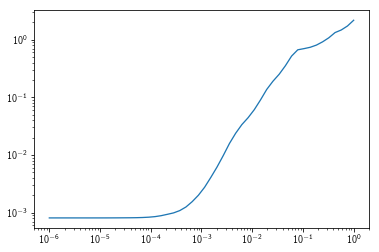

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=7.196856730011514e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
349 / 30000 iterations
applying cutoff
... took 78.36601279303432 seconds
(g,i)=(5000,8) ...
find hyperparameter
current_scores [7.75738849e-04 7.75657825e-04 7.75650451e-04 7.75670460e-04
 7.75661066e-04 7.75559743e-04 7.75455736e-04 7.75572964e-04
 7.76054538e-04 7.76527004e-04 7.76941295e-04 7.77388424e-04
 7.78540848e-04 7.81025329e-04 7.85154640e-04 7.91226621e-04
 8.01523635e-04 8.19671646e-04 8.52034834e-04 8.92490194e-04
 9.46508349e-04 1.04155476e-03 1.20874427e-03 1.50277310e-03
 1.96911621e-03 2.72443902e-03 4.05224458e-03 6.16608573e-03
 9.75857975e-03 1.58324901e-02 2.38031213e-02 3.36741948e-02
 4.43670874e-

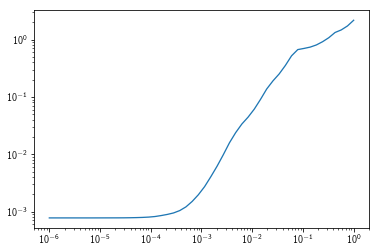

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.428675439323859e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
354 / 30000 iterations
applying cutoff
... took 83.86342177900951 seconds
(g,i)=(5000,9) ...
find hyperparameter
current_scores [7.77395026e-04 7.77387518e-04 7.77382577e-04 7.77411360e-04
 7.77447709e-04 7.77516125e-04 7.77528737e-04 7.77524750e-04
 7.77578315e-04 7.77821791e-04 7.78514521e-04 7.79127883e-04
 7.79915900e-04 7.81668369e-04 7.85234440e-04 7.91068403e-04
 8.01592430e-04 8.19987726e-04 8.52419098e-04 9.00100336e-04
 9.54384955e-04 1.04984586e-03 1.21776656e-03 1.51308407e-03
 1.96832396e-03 2.72399352e-03 4.05250516e-03 6.17748122e-03
 9.77831266e-03 1.58140171e-02 2.37710741e-02 3.36630126e-02
 4.44325840e-

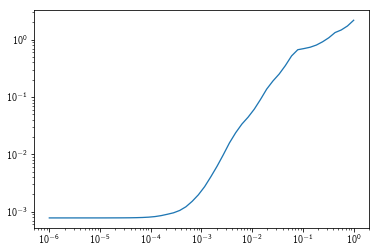

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.757510624854793e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
357 / 30000 iterations
applying cutoff
... took 77.63668914104346 seconds
(g,i)=(10000,0) ...
find hyperparameter
current_scores [4.01375727e-04 4.01373556e-04 4.01390746e-04 4.01425102e-04
 4.01489177e-04 4.01591273e-04 4.01729566e-04 4.01924858e-04
 4.02160024e-04 4.02508501e-04 4.03008226e-04 4.03736593e-04
 4.05108226e-04 4.07663805e-04 4.11739804e-04 4.17889739e-04
 4.28652582e-04 4.47678461e-04 4.81112063e-04 5.30749976e-04
 5.86476835e-04 6.84582047e-04 8.56703413e-04 1.15883449e-03
 1.64238450e-03 2.41852351e-03 3.78154652e-03 5.94796108e-03
 9.62247613e-03 1.57730911e-02 2.37487176e-02 3.36472985e-02
 4.43321145e

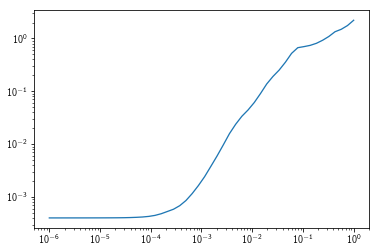

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.325711365590108e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
362 / 30000 iterations
applying cutoff
... took 80.55465037899558 seconds
(g,i)=(10000,1) ...
find hyperparameter
current_scores [4.07967144e-04 4.07957090e-04 4.07943779e-04 4.07938079e-04
 4.07962884e-04 4.07980032e-04 4.07918149e-04 4.07831307e-04
 4.07898914e-04 4.08045504e-04 4.08272244e-04 4.08889329e-04
 4.09946847e-04 4.11937315e-04 4.15404996e-04 4.21406492e-04
 4.31751680e-04 4.50017440e-04 4.82505373e-04 5.32376896e-04
 5.86750597e-04 6.82346972e-04 8.50403735e-04 1.14582508e-03
 1.61424629e-03 2.37136175e-03 3.70204060e-03 5.79489204e-03
 9.39866542e-03 1.55344308e-02 2.34970674e-02 3.33773466e-02
 4.39785567e

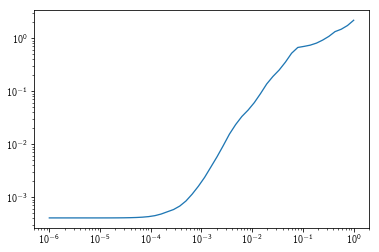

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=7.196856730011514e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
346 / 30000 iterations
applying cutoff
... took 75.80216304899659 seconds
(g,i)=(10000,2) ...
find hyperparameter
current_scores [4.15719958e-04 4.15711278e-04 4.15698852e-04 4.15691552e-04
 4.15523310e-04 4.15432381e-04 4.15378990e-04 4.15394134e-04
 4.15403490e-04 4.15663190e-04 4.16157078e-04 4.16966468e-04
 4.17951185e-04 4.19436031e-04 4.22303110e-04 4.27764362e-04
 4.38060353e-04 4.56634770e-04 4.89366868e-04 5.40801480e-04
 5.95263676e-04 6.90992241e-04 8.59375876e-04 1.15549705e-03
 1.62150639e-03 2.38022904e-03 3.71429063e-03 5.80919385e-03
 9.41497170e-03 1.55208774e-02 2.35076383e-02 3.33633612e-02
 4.40548947e

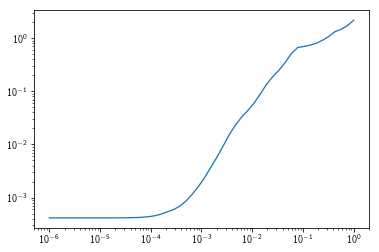

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.428675439323859e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
349 / 30000 iterations
applying cutoff
... took 78.2257545379689 seconds
(g,i)=(10000,3) ...
find hyperparameter
current_scores [3.96818458e-04 3.96797975e-04 3.96728632e-04 3.96651954e-04
 3.96591558e-04 3.96459420e-04 3.96329211e-04 3.96345472e-04
 3.96472160e-04 3.96866640e-04 3.97457812e-04 3.98028783e-04
 3.98827737e-04 4.00403558e-04 4.03665066e-04 4.09577746e-04
 4.20034441e-04 4.38505089e-04 4.71080658e-04 5.20953168e-04
 5.75080689e-04 6.70320299e-04 8.37750956e-04 1.13207311e-03
 1.59463628e-03 2.34916499e-03 3.67559144e-03 5.77159645e-03
 9.36357325e-03 1.54531009e-02 2.33782758e-02 3.33215319e-02
 4.40805478e-

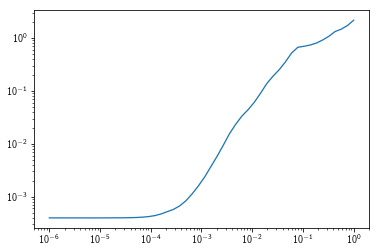

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.428675439323859e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
351 / 30000 iterations
applying cutoff
... took 76.67239512794185 seconds
(g,i)=(10000,4) ...
find hyperparameter
current_scores [4.18651138e-04 4.18622831e-04 4.18638950e-04 4.18689110e-04
 4.18693851e-04 4.18711460e-04 4.18864754e-04 4.19110812e-04
 4.19278534e-04 4.19595259e-04 4.20213299e-04 4.21175776e-04
 4.22539605e-04 4.24548578e-04 4.28178946e-04 4.34294622e-04
 4.44859769e-04 4.63273920e-04 4.95739364e-04 5.43960332e-04
 5.98226047e-04 6.93590445e-04 8.61183592e-04 1.15571598e-03
 1.60380580e-03 2.35854213e-03 3.68490894e-03 5.79508735e-03
 9.38833256e-03 1.54412975e-02 2.33572442e-02 3.31967025e-02
 4.38515818e

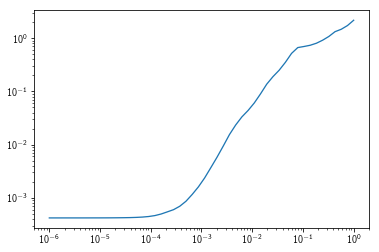

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.325711365590108e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
360 / 30000 iterations
applying cutoff
... took 80.77941235899925 seconds
(g,i)=(10000,5) ...
find hyperparameter
current_scores [4.14690245e-04 4.14728378e-04 4.14766267e-04 4.14804553e-04
 4.14851904e-04 4.14876505e-04 4.14831401e-04 4.14973966e-04
 4.15211383e-04 4.15707150e-04 4.16493528e-04 4.17519576e-04
 4.19302527e-04 4.22138650e-04 4.26446935e-04 4.33355928e-04
 4.45655974e-04 4.67284598e-04 5.04432593e-04 5.50586143e-04
 6.09405621e-04 7.12669315e-04 8.93455998e-04 1.21011014e-03
 1.71431873e-03 2.53231870e-03 3.95381319e-03 6.20679795e-03
 1.00588854e-02 1.62825790e-02 2.43291674e-02 3.42763565e-02
 4.50204564e

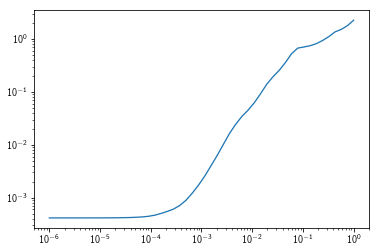

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
359 / 30000 iterations
applying cutoff
... took 79.11628621898126 seconds
(g,i)=(10000,6) ...
find hyperparameter
current_scores [4.12717509e-04 4.12697626e-04 4.12669787e-04 4.12577921e-04
 4.12494550e-04 4.12452876e-04 4.12448947e-04 4.12557658e-04
 4.12787850e-04 4.13117468e-04 4.13745616e-04 4.14753368e-04
 4.15935021e-04 4.18089069e-04 4.21532148e-04 4.27689302e-04
 4.38422685e-04 4.57608084e-04 4.91472679e-04 5.43840527e-04
 5.98985042e-04 6.95226215e-04 8.64309352e-04 1.16134126e-03
 1.62156339e-03 2.38310741e-03 3.72075552e-03 5.81917517e-03
 9.43781450e-03 1.55284708e-02 2.34939996e-02 3.32963788e-02
 4.40316110e-02 6.09598149e-

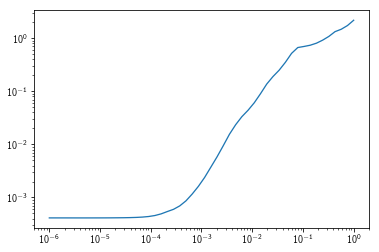

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=5.428675439323859e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
360 / 30000 iterations
applying cutoff
... took 81.00014804198872 seconds
(g,i)=(10000,7) ...
find hyperparameter
current_scores [4.07163848e-04 4.07174219e-04 4.07160256e-04 4.07191966e-04
 4.07267425e-04 4.07443812e-04 4.07820096e-04 4.08183589e-04
 4.08461287e-04 4.08641122e-04 4.09215153e-04 4.10313550e-04
 4.11719545e-04 4.13841801e-04 4.17608150e-04 4.23845976e-04
 4.34863222e-04 4.54322734e-04 4.88700500e-04 5.40209624e-04
 5.96512085e-04 6.95364797e-04 8.68967678e-04 1.17390181e-03
 1.65240587e-03 2.43776815e-03 3.81668307e-03 5.99068475e-03
 9.70918279e-03 1.59116388e-02 2.39004848e-02 3.37252896e-02
 4.44241610e

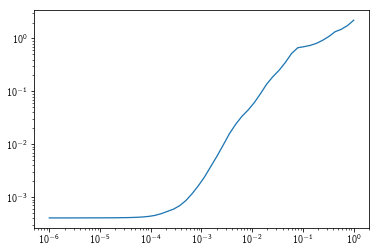

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.757510624854793e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
356 / 30000 iterations
applying cutoff
... took 80.63903919199947 seconds
(g,i)=(10000,8) ...
find hyperparameter
current_scores [4.07252289e-04 4.07224218e-04 4.07204293e-04 4.07199325e-04
 4.07227908e-04 4.07296903e-04 4.07385648e-04 4.07548761e-04
 4.07776156e-04 4.08183636e-04 4.08456106e-04 4.08936899e-04
 4.10038645e-04 4.12427532e-04 4.15951469e-04 4.22173989e-04
 4.32563690e-04 4.50911982e-04 4.83364236e-04 5.33717880e-04
 5.88269413e-04 6.85082076e-04 8.55440417e-04 1.15503627e-03
 1.63832298e-03 2.40944384e-03 3.76483655e-03 5.89734381e-03
 9.55352136e-03 1.57389591e-02 2.37125091e-02 3.37103967e-02
 4.44511227e

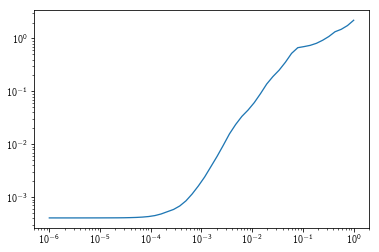

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.3299518105153717e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
354 / 30000 iterations
applying cutoff
... took 80.38944021298084 seconds
(g,i)=(10000,9) ...
find hyperparameter
current_scores [4.05375273e-04 4.05537926e-04 4.05560935e-04 4.05572504e-04
 4.05553837e-04 4.05563906e-04 4.05599205e-04 4.05608715e-04
 4.05757970e-04 4.05904835e-04 4.06302324e-04 4.07183747e-04
 4.08747569e-04 4.10762130e-04 4.14027205e-04 4.19846238e-04
 4.30238769e-04 4.49121380e-04 4.82689737e-04 5.29490095e-04
 5.84410150e-04 6.81507700e-04 8.52391879e-04 1.15309689e-03
 1.63345550e-03 2.40808458e-03 3.76987558e-03 5.93471492e-03
 9.61436778e-03 1.57800231e-02 2.37305614e-02 3.36028388e-02
 4.42009514

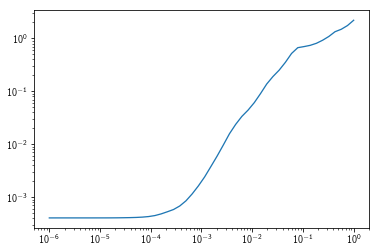

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
355 / 30000 iterations
applying cutoff
... took 79.70757601805963 seconds
(g,i)=(20000,0) ...
find hyperparameter
current_scores [2.17394325e-04 2.17379738e-04 2.17367928e-04 2.17357909e-04
 2.17351962e-04 2.17367205e-04 2.17453510e-04 2.17499190e-04
 2.17578509e-04 2.17860385e-04 2.18409330e-04 2.19241901e-04
 2.20468456e-04 2.22545706e-04 2.26186561e-04 2.32161229e-04
 2.42813252e-04 2.61539897e-04 2.94413040e-04 3.41374473e-04
 3.96375276e-04 4.92965170e-04 6.62641610e-04 9.60741898e-04
 1.43502977e-03 2.20221695e-03 3.55060127e-03 5.68824365e-03
 9.33398128e-03 1.54782741e-02 2.34397095e-02 3.33411368e-02
 4.40029938e-02 6.09875142e-

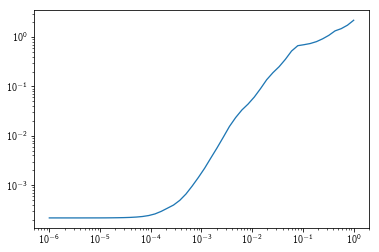

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.0888435964774785e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
352 / 30000 iterations
applying cutoff
... took 76.74456307501532 seconds
(g,i)=(20000,1) ...
find hyperparameter
current_scores [2.17250099e-04 2.17256276e-04 2.17275653e-04 2.17309014e-04
 2.17368054e-04 2.17474890e-04 2.17546011e-04 2.17754791e-04
 2.18123099e-04 2.18499189e-04 2.18966904e-04 2.19719514e-04
 2.20836638e-04 2.22520025e-04 2.25575445e-04 2.31194925e-04
 2.41516790e-04 2.59895747e-04 2.92474702e-04 3.48431048e-04
 4.04110593e-04 4.99934406e-04 6.68395009e-04 9.64531548e-04
 1.43424513e-03 2.19357478e-03 3.52806243e-03 5.63124106e-03
 9.24003099e-03 1.53527292e-02 2.33424016e-02 3.32319953e-02
 4.39151181

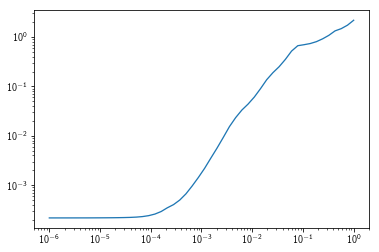

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
352 / 30000 iterations
applying cutoff
... took 76.94942244992126 seconds
(g,i)=(20000,2) ...
find hyperparameter
current_scores [2.11252452e-04 2.11232728e-04 2.11237138e-04 2.11277861e-04
 2.11322469e-04 2.11388062e-04 2.11444664e-04 2.11516918e-04
 2.11634929e-04 2.12005546e-04 2.12486207e-04 2.13318762e-04
 2.14326317e-04 2.16090701e-04 2.19241691e-04 2.25211624e-04
 2.35754498e-04 2.54386995e-04 2.87153789e-04 3.34722464e-04
 3.89348262e-04 4.85479040e-04 6.54596089e-04 9.52041452e-04
 1.41399417e-03 2.17938759e-03 3.52532935e-03 5.65192213e-03
 9.29262783e-03 1.54133192e-02 2.33951627e-02 3.33110381e-02
 4.39676764e-02 6.09347994e-

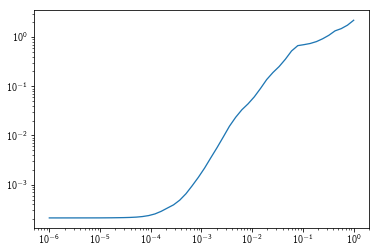

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.325711365590108e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
362 / 30000 iterations
applying cutoff
... took 81.23403901606798 seconds
(g,i)=(20000,3) ...
find hyperparameter
current_scores [2.22358837e-04 2.22320681e-04 2.22274986e-04 2.22268361e-04
 2.22277254e-04 2.22295102e-04 2.22341383e-04 2.22510213e-04
 2.22705308e-04 2.22992200e-04 2.23376735e-04 2.23991378e-04
 2.25034363e-04 2.26993658e-04 2.30570871e-04 2.36864469e-04
 2.47603395e-04 2.66492989e-04 2.99736573e-04 3.49719096e-04
 4.05043238e-04 5.02156757e-04 6.72676744e-04 9.72157874e-04
 1.44755480e-03 2.21666227e-03 3.56684575e-03 5.68379476e-03
 9.33885506e-03 1.55192819e-02 2.34627225e-02 3.33543633e-02
 4.40592684e

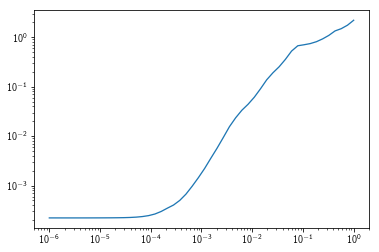

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.3299518105153717e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
361 / 30000 iterations
applying cutoff
... took 80.88262851291802 seconds
(g,i)=(20000,4) ...
find hyperparameter
current_scores [2.21755636e-04 2.21744398e-04 2.21721305e-04 2.21728087e-04
 2.21746882e-04 2.21808188e-04 2.21788878e-04 2.21807239e-04
 2.21924877e-04 2.22115455e-04 2.22420157e-04 2.22931090e-04
 2.24057193e-04 2.25888783e-04 2.29232322e-04 2.35191698e-04
 2.45497081e-04 2.63794031e-04 2.96351640e-04 3.43536824e-04
 3.98234578e-04 4.94266658e-04 6.62911769e-04 9.59131971e-04
 1.42119731e-03 2.17985239e-03 3.51293723e-03 5.61110426e-03
 9.21942294e-03 1.53229372e-02 2.33046846e-02 3.32132553e-02
 4.38699362

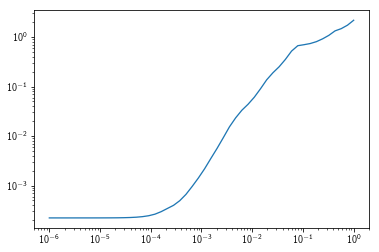

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.757510624854793e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
353 / 30000 iterations
applying cutoff
... took 79.31189761101268 seconds
(g,i)=(20000,5) ...
find hyperparameter
current_scores [2.13546997e-04 2.13555209e-04 2.13565354e-04 2.13561714e-04
 2.13551544e-04 2.13566467e-04 2.13607795e-04 2.13741470e-04
 2.13955934e-04 2.14115278e-04 2.14367961e-04 2.14774063e-04
 2.15704064e-04 2.17620549e-04 2.21145867e-04 2.27271287e-04
 2.38150844e-04 2.57151898e-04 2.90219392e-04 3.41570164e-04
 3.96340658e-04 4.92711444e-04 6.61943386e-04 9.59183716e-04
 1.41650926e-03 2.17913025e-03 3.51908825e-03 5.64389139e-03
 9.26538368e-03 1.53933774e-02 2.33310275e-02 3.32724803e-02
 4.39764219e

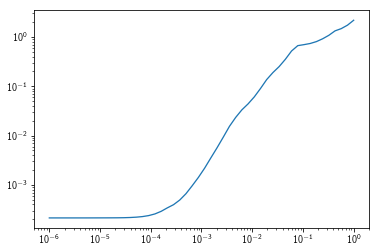

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
361 / 30000 iterations
applying cutoff
... took 81.11684331693687 seconds
(g,i)=(20000,6) ...
find hyperparameter
current_scores [2.15158494e-04 2.15165324e-04 2.15166697e-04 2.15171419e-04
 2.15204899e-04 2.15265762e-04 2.15225735e-04 2.15280588e-04
 2.15462797e-04 2.15631266e-04 2.15875975e-04 2.16426254e-04
 2.17445073e-04 2.19370064e-04 2.22813650e-04 2.28961806e-04
 2.39679095e-04 2.58447269e-04 2.91225686e-04 3.42954816e-04
 3.97588906e-04 4.93637115e-04 6.62425883e-04 9.59051440e-04
 1.42707002e-03 2.18841099e-03 3.52622484e-03 5.64695246e-03
 9.26642626e-03 1.54195572e-02 2.33458779e-02 3.32209022e-02
 4.38485090e-02 6.08591536e-

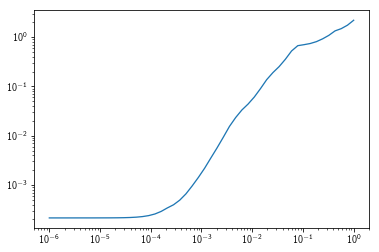

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
359 / 30000 iterations
applying cutoff
... took 80.5670938079711 seconds
(g,i)=(20000,7) ...
find hyperparameter
current_scores [2.29598646e-04 2.29609425e-04 2.29593201e-04 2.29602885e-04
 2.29621705e-04 2.29681844e-04 2.29794510e-04 2.29862106e-04
 2.29947496e-04 2.30115371e-04 2.30519422e-04 2.31347730e-04
 2.32864550e-04 2.35163164e-04 2.38846511e-04 2.44935838e-04
 2.55597822e-04 2.74366345e-04 3.07248349e-04 3.52997607e-04
 4.07356202e-04 5.03332239e-04 6.71984889e-04 9.68393160e-04
 1.43411030e-03 2.19646696e-03 3.53649608e-03 5.67353589e-03
 9.30257928e-03 1.54604469e-02 2.34045959e-02 3.33044039e-02
 4.39066793e-02 6.08625649e-0

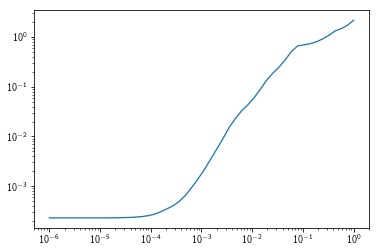

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=1.757510624854793e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
353 / 30000 iterations
applying cutoff
... took 78.03800333698746 seconds
(g,i)=(20000,8) ...
find hyperparameter
current_scores [2.12062010e-04 2.12039594e-04 2.12000913e-04 2.11993497e-04
 2.12009566e-04 2.12035193e-04 2.12049445e-04 2.12070531e-04
 2.12173053e-04 2.12438814e-04 2.12785319e-04 2.13442550e-04
 2.14539226e-04 2.16397260e-04 2.19834992e-04 2.25721883e-04
 2.36002287e-04 2.54199040e-04 2.86393609e-04 3.35224394e-04
 3.89095184e-04 4.83775249e-04 6.50178581e-04 9.42637009e-04
 1.39499756e-03 2.14299667e-03 3.45751425e-03 5.54421354e-03
 9.10109654e-03 1.51323760e-02 2.30417965e-02 3.28679384e-02
 4.34770698e

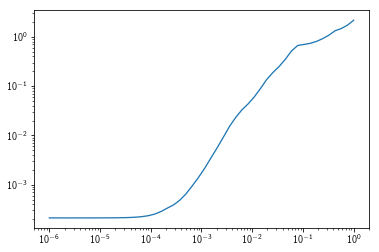

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=2.3299518105153717e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
360 / 30000 iterations
applying cutoff
... took 80.7410104869632 seconds
(g,i)=(20000,9) ...
find hyperparameter
current_scores [2.29428701e-04 2.29418257e-04 2.29402319e-04 2.29381564e-04
 2.29358888e-04 2.29390974e-04 2.29432906e-04 2.29489025e-04
 2.29518144e-04 2.29709559e-04 2.30065774e-04 2.30544892e-04
 2.31384878e-04 2.33099264e-04 2.36160744e-04 2.41610239e-04
 2.51960969e-04 2.70640215e-04 3.03553434e-04 3.55097825e-04
 4.09735805e-04 5.06151696e-04 6.75630091e-04 9.73525221e-04
 1.44309272e-03 2.20701098e-03 3.54957796e-03 5.66079206e-03
 9.29142360e-03 1.54512055e-02 2.35063392e-02 3.34293189e-02
 4.41674527e

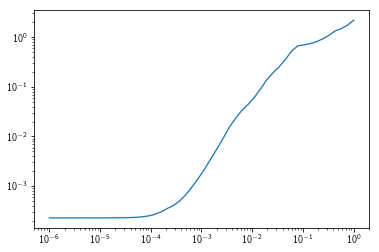

estimating model
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=3.0888435964774785e-06, lambda=1.0)!
status 0: Optimization terminated successfully.
352 / 30000 iterations
applying cutoff
... took 78.60628799302503 seconds


In [27]:
estimated_rates = dict()
l1_err = dict()
used_alphas = dict()
for g in gillespie_realisations:
    cv_res_g = cv_results[cv_results.gillespie_realisations == g]
    estimated_rates[g] = dict() 
    l1_err[g] = dict()
    used_alphas[g] = dict()
    for i in iids:
        print("(g,i)=({},{}) ...".format(g, i))
        
        print("find hyperparameter")
        cv_res = cv_res_g[cv_res_g.iid == i]
        cv_res = cv_res.sort_values(by="alpha")
        current_alphas = np.array([x for x in cv_res.alpha.values])
        
        current_scores = np.array([x for x in cv_res.scores.values])[:,:] # use all folds
        current_scores = np.mean(current_scores, axis=1) # average over folds
        #print(current_alphas)
        print("current_scores", -current_scores)
        min_indices = np.argmin(-current_scores, axis=0)
        optimal_alpha = alphas[min_indices]
        used_alphas[g][i] = optimal_alpha
        plt.plot(current_alphas, -current_scores)
        plt.xscale("log")
        plt.yscale("log")
        plt.show()
        t1 = time.perf_counter()
        
        print("estimating model")
        # @todo check to which trajs this is estimated
        rates, analyse = rs.estimate(alpha=optimal_alpha, gillespie_realisations=g, iid_id=i, 
                                     traj_file_path="./gillespie_trajs_conced_1_3_zipped_shuffled.h5")
        
        print("applying cutoff")
        rates[rates < 0.22] = 0.
        
        estimated_rates[g][i] = rates
        l1_err[g][i] = np.sum(np.abs(rates-desired_rates))
        t2 = time.perf_counter()
        print("... took {} seconds".format(t2-t1))

In [28]:
rates_arr = np.array([ [estimated_rates[g][i] for i in iids] for g in gillespie_realisations])
l1_err_arr = np.array([ [l1_err[g][i] for i in iids] for g in gillespie_realisations])
used_alphas_arr = np.array([ [used_alphas[g][i] for i in iids] for g in gillespie_realisations])

In [29]:
if True:
    np.savez("case3_validation_alphas_and_solutions_averagefolds_zippedtraj_20folds_shuffled.npz", rates=rates_arr, l1_dev=l1_err_arr, alpha_val=used_alphas_arr, gillespie_realisations=gillespie_realisations, desired_rates=desired_rates)

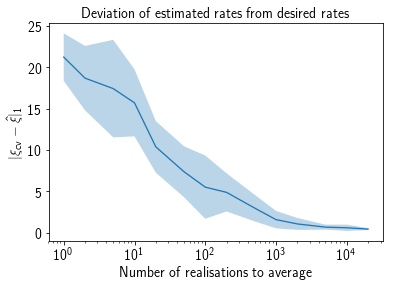

In [30]:
plt.style.use("lm")
mean = np.mean(l1_err_arr, axis=1)
err = np.std(l1_err_arr, axis=1) #/ np.sqrt(10.) # 10 iids
plt.plot(gillespie_realisations, mean)
plt.fill_between(gillespie_realisations, y1=np.clip(mean-err, 0., 1e16), y2=mean+err, alpha=0.3)
plt.xscale("log")
plt.xlabel("Number of realisations to average")
plt.ylabel(r"$|\xi_\mathrm{cv}-\hat{\xi}|_1$")
plt.title("Deviation of estimated rates from desired rates")
ymin, ymax = plt.ylim()
#plt.ylim(-1,ymax)
plt.savefig("case3_convergence_averagefolds_zippedtraj_20folds_shuffled.pdf", bbox_inches="tight", transparent=True)

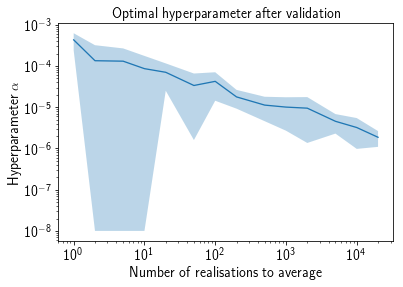

In [31]:

mean = np.mean(used_alphas_arr, axis=1)
err = np.std(used_alphas_arr, axis=1) #/ np.sqrt(10.) # 10 iids
plt.plot(gillespie_realisations, mean)
plt.fill_between(gillespie_realisations, y1=np.clip(mean-err, 1e-8, 1.), y2=mean+err, alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of realisations to average")
plt.ylabel(r"Hyperparameter $\alpha$")
plt.title("Optimal hyperparameter after validation")
#ymin, ymax = plt.ylim()
#plt.ylim(-1,ymax)
plt.savefig("case3_best_hyperparameter_averagefolds_zippedtraj_20folds_shuffled.pdf", bbox_inches="tight", transparent=True)

In [ ]:
g_idx = -1
i_idx = 3
print(gillespie_realisations[g_idx])
analysis.plot_rates_bar(desired_rates, np.mean(rates_arr[g_idx], axis=0))

#plt.savefig("case2_exemplary_solution_n"+str(gillespie_realisations[g_idx])+".pdf", bbox_inches="tight", transparent=True)

obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
359 / 30000 iterations


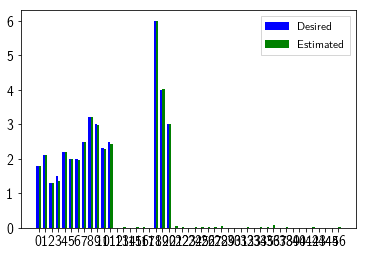

In [33]:
rates, analyse = rs.estimate(alpha=0., gillespie_realisations=20000, iid_id=0, traj_file_path="./gillespie_trajs_conced_1_3_zipped.h5")
analysis.plot_rates_bar(desired_rates, rates)

In [41]:
import importlib
importlib.reload(rs)

<module 'run_cv' from '/srv/public/chrisfr/workspace/readdy_learn_pycharm/allegro/run_cv.py'>

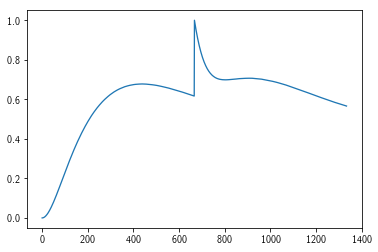

(1334, 9)

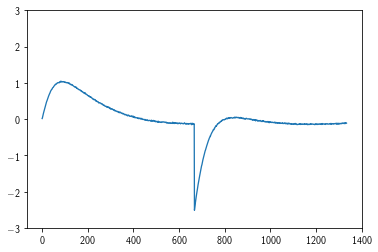

In [64]:
counts, dcounts_dt = rs.get_traj_from_file(filename="./gillespie_trajs_conced_1_3_normal.h5", n_gillespie_realisations=20000, iid=0)
species = 8
plt.plot(counts[:,species], "-", markersize=0.3)
plt.show()
plt.plot(dcounts_dt[:,species], "-", markersize=0.3)
plt.ylim(-3,3)
counts.shape

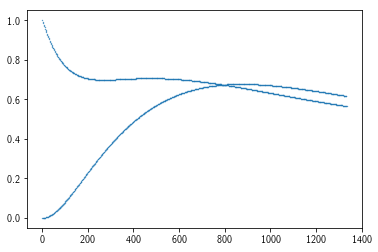

(1334, 9)

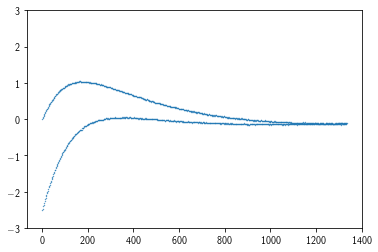

In [65]:
counts, dcounts_dt = rs.get_traj_from_file(filename="./gillespie_trajs_conced_1_3_zipped.h5", n_gillespie_realisations=20000, iid=0)
plt.plot(counts[:,species], ".", markersize=0.7)
plt.show()
plt.plot(dcounts_dt[:,species], ".", markersize=0.7)
plt.ylim(-3,3)
counts.shape

obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
362 / 30000 iterations


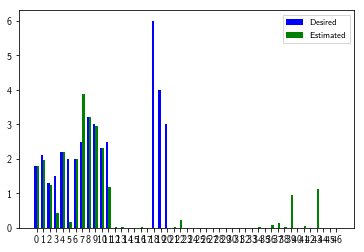

In [30]:
rates, analyse = rs.estimate(alpha=0., gillespie_realisations=20000, iid_id=0, traj_file_path="./gillespie_trajs_otherinit.h5")
analysis.plot_rates_bar(desired_rates, rates)

obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
427 / 30000 iterations


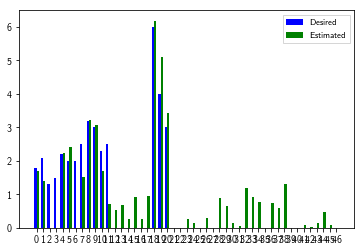

In [31]:
rates, analyse = rs.estimate(alpha=0., gillespie_realisations=500, iid_id=0, traj_file_path="./gillespie_trajs.h5")
analysis.plot_rates_bar(desired_rates, rates)

In [32]:
def generate_lma_noise():
    regulation_network, analysis = rs.get_regulation_network(
        3e-3, lma_noise=0., target_time=2.,
        gillespie_realisations=None, scale=1.)
    traj = analysis.get_traj(0)
    return traj.counts, traj.dcounts_dt, traj.time_step

In [46]:
lma_counts, lma_dcounts_dt, dt =  generate_lma_noise()

obtaining regulation network with dt = 0.003
generating data by integrating the law of mass action with additive lma_noise 0.0
0.003
0.003


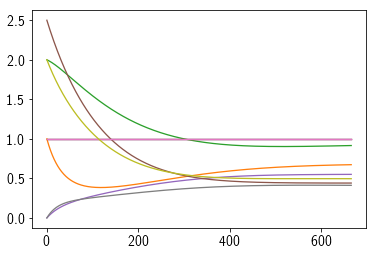

In [47]:
plt.plot(lma_counts)

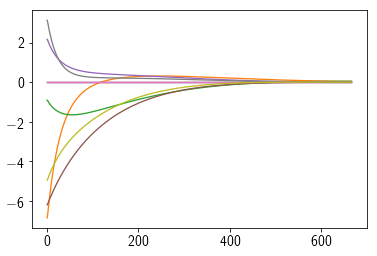

In [48]:
plt.plot(lma_dcounts_dt)

In [57]:
rates, analyse = rs.estimate_counts(0., lma_counts, lma_dcounts_dt, 3e-3)

obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
442 / 30000 iterations


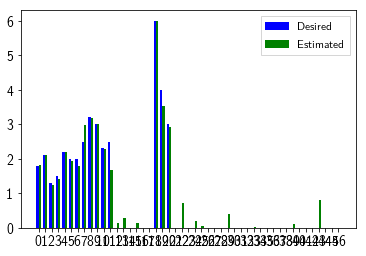

In [58]:
analysis.plot_rates_bar(desired_rates, rates)

In [36]:
counts_3, dcounts_dt_3, _ = rs.generate_counts(3e-3, gillespie_realisations=5000)

run generate_traj with splitter='kfold', dt=0.003, lma_noise=0.0, target_time=2.0, gillespie_realisations=5000
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500
generating data using gillespie kmc averaged over 5000 realisations


0.003
0.003


obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
452 / 30000 iterations


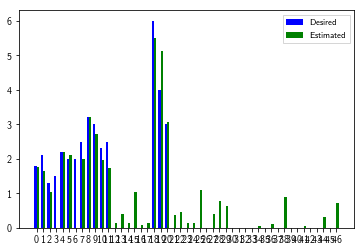

In [37]:
rates, analyse = rs.estimate_counts(0., counts_3, dcounts_dt_3, 3e-3)
analysis.plot_rates_bar(desired_rates, rates)

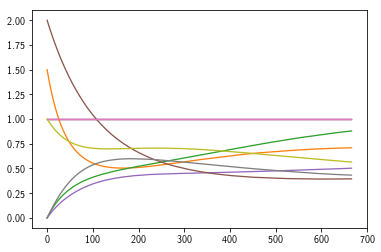

In [38]:
plt.plot(counts_3)

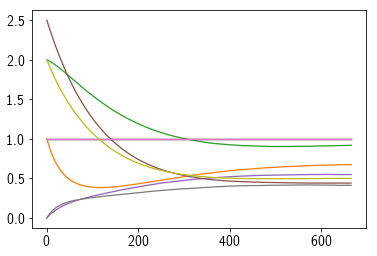

In [66]:
# old, was probably init2?
plt.plot(counts_3)

In [67]:
counts_1, dcounts_dt_1 = rs.get_traj_from_file(filename="./gillespie_trajs.h5", n_gillespie_realisations=20000, iid=0)

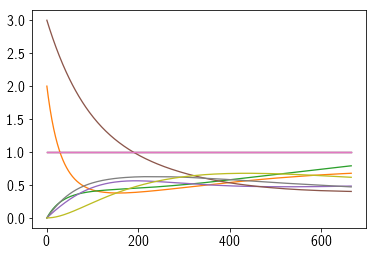

In [68]:
plt.plot(counts_1)

# LSQ solution

In [ ]:
estimated_rates = dict()
l1_err = dict()
used_alphas = dict()
for g in gillespie_realisations:
    cv_res_g = cv_results[cv_results.gillespie_realisations == g]
    estimated_rates[g] = dict() 
    l1_err[g] = dict()
    used_alphas[g] = dict()
    for i in iids:
        print("(g,i)=({},{}) ...".format(g, i))
        
        optimal_alpha = 0.
        used_alphas[g][i] = optimal_alpha

        t1 = time.perf_counter()
        
        print("estimating model with alpha={}".format(optimal_alpha))
        rates, analyse = rs.estimate(alpha=optimal_alpha, gillespie_realisations=g, iid_id=i, 
                                     traj_file_path="./gillespie_trajs_conced_1_3_zipped_shuffled.h5")
        
        print("applying cutoff")
        rates[rates < 0.22] = 0.
        
        estimated_rates[g][i] = rates
        l1_err[g][i] = np.sum(np.abs(rates-desired_rates))
        t2 = time.perf_counter()
        print("... took {} seconds".format(t2-t1))

(g,i)=(1,0) ...
estimating model with alpha=0.0
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
262 / 30000 iterations
applying cutoff
... took 58.173147579072975 seconds
(g,i)=(1,1) ...
estimating model with alpha=0.0
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
242 / 30000 iterations
applying cutoff
... took 54.68137204099912 seconds
(g,i)=(1,2) ...
estimating model with alpha=0.0
obtaining regulation network with d

0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
288 / 30000 iterations
applying cutoff
... took 62.98611593490932 seconds
(g,i)=(2,9) ...
estimating model with alpha=0.0
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
279 / 30000 iterations
applying cutoff
... took 60.60514004295692 seconds
(g,i)=(5,0) ...
estimating model with alpha=0.0
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha

0.003
0.003
Trying tolerance 1e-16
optimization problem did exit successfully (alpha=0.0, lambda=1.0)!
status 0: Optimization terminated successfully.
314 / 30000 iterations
applying cutoff
... took 70.69425645191222 seconds
(g,i)=(10,7) ...
estimating model with alpha=0.0
obtaining regulation network with dt = 0.003
scaling population up, timestep down and bimol. rates down by factor 500.0
generating data using gillespie kmc averaged over 1 realisations
0.003
0.003
Trying tolerance 1e-16


In [ ]:
rates_arr = np.array([ [estimated_rates[g][i] for i in iids] for g in gillespie_realisations])
l1_err_arr = np.array([ [l1_err[g][i] for i in iids] for g in gillespie_realisations])
used_alphas_arr = np.array([ [used_alphas[g][i] for i in iids] for g in gillespie_realisations])

In [ ]:
if True:
    np.savez("case3_solutions_lsq_zippedtraj_shuffled.npz", rates=rates_arr, l1_dev=l1_err_arr, alpha_val=used_alphas_arr, gillespie_realisations=gillespie_realisations, desired_rates=desired_rates)

In [ ]:
#plt.style.use("lm")
mean = np.mean(l1_err_arr, axis=1)
err = np.std(l1_err_arr, axis=1) #/ np.sqrt(10.) # 10 iids
plt.plot(gillespie_realisations, mean)
plt.fill_between(gillespie_realisations, y1=np.clip(mean-err, 0., 1e16), y2=mean+err, alpha=0.3)
plt.xscale("log")
plt.xlabel("Number of realisations to average")
plt.ylabel(r"$|\xi_\mathrm{cv}-\hat{\xi}|_1$")
plt.title("Deviation of estimated rates from desired rates")
ymin, ymax = plt.ylim()
#plt.ylim(-1,ymax)
plt.savefig("case3_convergence_lsq_zippedtraj_shuffled.pdf", bbox_inches="tight", transparent=True)